In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # 引入 numpy，以備不時之需
import json # 雖然您已有 load_json_map，但此處先引入以備後續可能操作

# --- 載入資料的程式碼 (您已提供) ---
data_path = '../data/'
map_path = '../maps/'

def load_csv_data(file_name, file_description):
    try:
        df = pd.read_csv(f"{data_path}{file_name}", low_memory=False)
        print(f"已成功載入{file_description}: {file_name}")
        return df
    except FileNotFoundError:
        print(f"錯誤：找不到{file_description} '{data_path}{file_name}'。將使用空 DataFrame。")
        return pd.DataFrame()

# 假設 JSON 載入函數也先放在這裡備用
def load_json_map(file_name, map_description, is_value_map=False):
    try:
        with open(f"{map_path}{file_name}", 'r', encoding='utf-8-sig') as f: data = json.load(f)
        print(f"已成功載入{map_description}: {file_name}")
        if is_value_map: return data.get("value_maps", {}), data.get("general_options", {})
        return data
    except FileNotFoundError: print(f"警告：找不到{map_description} '{map_path}{file_name}'。"); return ({}, {}) if is_value_map else {}
    except json.JSONDecodeError: print(f"錯誤：解析{map_description} '{map_path}{file_name}' 時發生錯誤。"); return ({}, {}) if is_value_map else {}

df_s = load_csv_data('TIGPSw1_s_descriptive_labeled.csv', '學生問卷資料')
# 為了聚焦，我們先註解掉其他資料的載入，除非您確認接下來會用到它們與 df_s 的合併
# df_p = load_csv_data('TIGPSw1_p_descriptive_labeled.csv', '家長問卷資料')
df_t = load_csv_data('TIGPSw1_t_descriptive_labeled.csv', '導師問卷資料')
df_st = load_csv_data('TIGPSw1_st_descriptive_labeled.csv', '科任教師問卷資料')
# df_sc = load_csv_data('TIGPSw1_sc_descriptive_labeled.csv', '學校問卷資料')

# --- 中文字體設定 ---
# 請根據您的作業系統和已安裝的字體進行調整
# 方法一：設定全局字體 (macOS/Linux 可能需要指定字體路徑，例如 /System/Library/Fonts/STHeiti Medium.ttc)
# Windows常見： 'Microsoft YaHei', 'SimHei', 'KaiTi'
# macOS常見： 'PingFang HK', 'PingFang SC', 'Heiti TC', 'Arial Unicode MS'
try:
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'PingFang HK', 'Heiti TC'] # 嘗試多個常用中文字體
    plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題
    print("已嘗試設定Matplotlib中文字體。")
except Exception as e:
    print(f"設定Matplotlib中文字體時發生錯誤: {e}")
    print("如果圖表中文顯示為方塊，請確保已安裝中文字體，並正確設定 plt.rcParams['font.sans-serif']。")
    print("例如：plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']") # 台灣用戶可嘗試微軟正黑體

# 檢查導師問卷資料是否成功載入
if df_t.empty:
    print("導師問卷資料未成功載入，後續分析無法進行。請檢查檔案路徑和名稱。")
else:
    print(f"\n導師問卷資料 (df_t) 載入成功，共有 {df_t.shape[0]} 筆記錄， {df_t.shape[1]} 個欄位。")
    print("df_t 前幾筆資料預覽：")
    print(df_t.head())

已成功載入學生問卷資料: TIGPSw1_s_descriptive_labeled.csv
已成功載入導師問卷資料: TIGPSw1_t_descriptive_labeled.csv
已成功載入科任教師問卷資料: TIGPSw1_st_descriptive_labeled.csv
已嘗試設定Matplotlib中文字體。

導師問卷資料 (df_t) 載入成功，共有 242 筆記錄， 259 個欄位。
df_t 前幾筆資料預覽：
   題本編號            問卷名稱 教師ID(年分別、科目別) 教師ID(科目別)      教師 ID  學校 ID  班級  \
0  SA01  2023國中段正式施測-教師   t1120020200  t0020200  t00200010      2   2   
1  SA01  2023國中段正式施測-教師   t1120030100  t0030100  t00300951      3   1   
2  SA01  2023國中段正式施測-教師   t1120040100  t0040100  t00400952      4   1   
3  SA01  2023國中段正式施測-教師   t1120040200  t0040200  t00400017      4   2   
4  SA01  2023國中段正式施測-教師   t1120050100  t0050100  t00500026      5   1   

   學校班級 ID 學校類型 共同問卷有無填寫  ... (11)召開校內會議討論該議題 (12)轉介校外的機構、組織提供協助 (13)無此情形  \
0      202   私立        有  ...              沒有                 沒有       沒有   
1      301   私立        有  ...              沒有                 沒有       沒有   
2      401   私立        有  ...              沒有                 沒有       沒有   
3      402   私立        無  ...    

In [143]:
# 檢查學生問卷資料是否成功載入
if df_s.empty:
    print("學生問卷資料未成功載入，後續分析無法進行。請檢查檔案路徑和名稱。")
else:
    print(f"\n學生問卷資料 (df_s) 載入成功，共有 {df_s.shape[0]} 筆記錄， {df_s.shape[1]} 個欄位。")
    print("df_s 前幾筆資料預覽：")
    print(df_s.head())


學生問卷資料 (df_s) 載入成功，共有 8958 筆記錄， 688 個欄位。
df_s 前幾筆資料預覽：
   題本編號               問卷名稱        學生 ID  學校 ID  班級  學校班級 ID  學校類型 座號  \
0  CO01  2023國中段正式施測-學生問卷A  s0020100001      2   1      201     2  1   
1  CO01  2023國中段正式施測-學生問卷A  s0020100002      2   1      201     2  2   
2  CO01  2023國中段正式施測-學生問卷A  s0020100003      2   1      201     2  3   
3  CO01  2023國中段正式施測-學生問卷A  s0020100004      2   1      201     2  5   
4  CO01  2023國中段正式施測-學生問卷A  s0020100005      2   1      201     2  6   

  請問你的性別(生理性別)? 請問你是哪一年出生?  ... 你開始長鬍子了嗎?(男生回答,女生請填1) 妳的胸部開始發育了嗎?(女生回答,男生請填1)  \
0             男         99  ...                只長出一點點                    我是男生   
1             男         99  ...                只長出一點點                    我是男生   
2             男         99  ...                只長出一點點                    我是男生   
3             男         99  ...                還沒開始長出                    我是男生   
4             男         98  ...                還沒開始長出                    我是男生   

  妳的月經來了嗎?是在什麼時候?(女生回答,男

In [144]:
# 檢查科任教師問卷資料是否成功載入
if df_st.empty:
    print("科任教師問卷資料未成功載入，後續分析無法進行。請檢查檔案路徑和名稱。")
else:
    print(f"\n科任教師問卷資料 (df_t) 載入成功，共有 {df_st.shape[0]} 筆記錄， {df_st.shape[1]} 個欄位。")
    print("df_t 前幾筆資料預覽：")
    print(df_st.head())


科任教師問卷資料 (df_t) 載入成功，共有 1094 筆記錄， 156 個欄位。
df_t 前幾筆資料預覽：
   題本編號            問卷名稱 教師 ID（年分別、科目別） 教師 ID（科目別）      教師 ID  學校 ID  班級  \
0  SB01  2023國中段正式施測-教師    t1120020201   t0020201  t00200005      2   2   
1  SB01  2023國中段正式施測-教師    t1120020101   t0020101  t00200006      2   1   
2  SB01  2023國中段正式施測-教師    t1120030101   t0030101  t00300012      3   1   
3  SB01  2023國中段正式施測-教師    t1120040201   t0040201  t00400015      4   2   
4  SB01  2023國中段正式施測-教師    t1120040101   t0040101  t00400024      4   1   

   學校班級 ID 學校類型  科目  ... 學校提供資訊安全的校園宣導方案（個人隱私與資訊安全、防毒與駭客、網路交易安全等）  \
0      202   私立  國文  ...                                      不符合   
1      201   私立  國文  ...                                       符合   
2      301   私立  國文  ...                                      很符合   
3      402   私立  國文  ...                                       符合   
4      401   私立  國文  ...                                      很符合   

  學校提供網路素養的校園宣導方案（網路交友、網路禮節、網路霸凌等） 學校提供資訊驗證的校園宣導方案（打擊假新聞、事實查核等） 教學素材短缺或不足  \

# 1.1：資料檢視-df_s(學生問卷)

在進行預處理和分析之前，我們首先需要檢視這些新加入欄位的原始狀態，包括它們的資料類型、遺失值情況以及唯一值。

In [145]:
# 假設 df_s 已經成功載入
if df_s.empty:
    print("學生問卷資料 (df_s) 是空的，請先確保已成功載入。")
else:
    # --- 定義本次新增的特徵變項的欄位名稱 ---
    new_feature_columns_to_inspect = [
        # 數位學習行為 - 時間投入
        "課外的學習(各種線上付費或免費的課程)", # as35b (預期數值型)
        # 數位學習行為 - 設備使用頻率
        # "智慧型手機",                             # as56b (預期類別型)
        # "平板或電子書閱讀器(iPad, Kindle...)",    # as56d (預期類別型)
        # 數位學習行為 - 線上學習自我管理
        # "我能要求自己先完成作業或讀書進度後,才能去看我喜歡的網站或玩手機。", # as59b (預期類別型)
        # "我會運用學習平台上的儀表板,了解自己的認真或表現情況(...)", # as59c (預期類別型)
        # "我會運用學習平台以外的軟體(如:Google日曆、Forrest、Notion、Anki等),安排我的學習進度。", # as59d (預期類別型)
        # 學習動機/興趣
        "我喜歡學校。",                             # as14a (預期類別型)
        "你跟得上學校課業進度嗎?"                   # as19  (預期類別型)
    ]

    # --- 檢查欄位是否存在 ---
    missing_in_df_new = []
    for col in new_feature_columns_to_inspect:
        if col not in df_s.columns:
            missing_in_df_new.append(col)

    if missing_in_df_new:
        print(f"錯誤：以下指定的新增欄位在 df_s 中不存在，請檢查欄位名稱是否完全正確：")
        for col_name in missing_in_df_new:
            print(f"- \"{col_name}\"")
        print("請修正欄位名稱後再試一次。")
    else:
        print("所有指定的新增欄位均存在於 df_s 中。")
        print("-" * 50)

        # --- 顯示欄位資訊 ---
        print("\n本次新增欄位的基本資訊：")
        # .copy()是為了避免SettingWithCopyWarning，雖然此處只是檢視，但加上無妨
        df_s[new_feature_columns_to_inspect].info(verbose=True, show_counts=True)

        print("\n" + "=" * 50)
        print("詳細檢視各新增欄位：")
        print("=" * 50)

        for col_name in new_feature_columns_to_inspect:
            print(f"\n--- 檢視欄位: \"{col_name}\" ---")
            print(f"資料類型: {df_s[col_name].dtype}")
            print(f"遺失值數量: {df_s[col_name].isnull().sum()}")
            print("唯一值及其計數 (顯示前20項，若過多):")
            value_counts_series = df_s[col_name].value_counts(dropna=False)
            print(value_counts_series.head(20))
            if len(value_counts_series) > 20:
                print(f"... (共 {len(value_counts_series)} 種唯一值)")
            print("-" * 30)

        print("\n" + "=" * 50)
        print("新增欄位檢視完成。請根據以上輸出結果，判斷後續需要的資料清理或轉換。")

所有指定的新增欄位均存在於 df_s 中。
--------------------------------------------------

本次新增欄位的基本資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8958 entries, 0 to 8957
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   課外的學習(各種線上付費或免費的課程)  8958 non-null   object
 1   我喜歡學校。               8958 non-null   object
 2   你跟得上學校課業進度嗎?         8958 non-null   object
dtypes: object(3)
memory usage: 210.1+ KB

詳細檢視各新增欄位：

--- 檢視欄位: "課外的學習(各種線上付費或免費的課程)" ---
資料類型: object
遺失值數量: 0
唯一值及其計數 (顯示前20項，若過多):
課外的學習(各種線上付費或免費的課程)
此卷未答       4221
沒有         2216
0.5小時以內     782
跳答          583
0.5-1小時     546
1-1.5小時     227
1.5-2小時     136
2-2.5小時      67
2.5-3小時      46
系統遺漏值        38
5小時以上        34
3-3.5小時      34
3.5-4小時      16
4.5-5小時       7
4-4.5小時       5
Name: count, dtype: int64
------------------------------

--- 檢視欄位: "我喜歡學校。" ---
資料類型: object
遺失值數量: 0
唯一值及其計數 (顯示前20項，若過多):
我喜歡學校。
同意       4570
很同意      2543
不同意    

# 1.2：資料檢視-df_t(導師問卷)

In [146]:
# 假設 df_t 已經成功載入
if df_t.empty:
    print("學生問卷資料 (df_t) 是空的，請先確保已成功載入。")
else:
    # --- 定義本次新增的特徵變項的欄位名稱 ---
    new_feature_columns_to_inspect = [
        "我操作數位資源(如多媒體、視覺化呈現等)幫助學生學習。",   #"at29a": 
        "我在線上(如會議軟體WebEX、社交媒體LINE or FB、協作平台Office 365)中教課。",   #"at29b"
        "我運用多種線上教學平台(如 Google Meet, Teams, 因材網、均一等)教課。",    #"at29c": 
        "我創造幫助學生學習新知識與技能的線上環境。",    #"at29d": 
        "我在數位情境下使用多種教學方法。",    #"at29e": 
        "我運用平台數據監控學生數位情境下的學習互動。",    #"at29f": 
        "我鼓勵學生在數位情境中學習互動。",    #"at29g": 
        "我運用數位平台的後台評量結果回饋,來調整自己的教學。","我運用科技預測學生應學到的技能/或理解概念的程度。","我透過科技轉變呈現手法,讓課本知識變得好懂易學。","我能做到目前主管教育機關對老師的數位教學要求。","我清楚有序地向學生溝通我教授的單元主題。","我清楚有序地向學生溝通學習目標。","我給予學生明確的指示,以引導他們參與我的學習活動。","我讓學生知道學習的完成期限以及課程進度。","我幫助學生辨認對學習主題正反雙方的意見。","我能指導學生澄清概念,以完整理解/掌握課程主題。","我幫助班級同學在學習活動中進行建設性的對話/討論。","我督促學生專注於學習活動上。","我鼓勵學生探索新的概念。","我的教學行動強化了學生認同這個網路學習社群。","我幫助學生聚焦討論主題。","我根據課程目標給予學生回饋,幫助他們了解自己的優缺點。","我在適當的時機給予學習回饋。",

        # at34 at35 at36
        "請問您使用行動載具融入教學,平均每天多少時數?","請問您運用「其他」資訊科技融入教學,平均每天多少時數?(不含使用平板等行動載具,例如:使用大螢幕播放網路影片、請學生在電腦教室上網找資料……等)","請問您在教學前、中、後運用學習平台儀表板,平均每天多少時數?(例如以均一、PagamO、或因才網後台的學生報表,了解學生觀看影片的狀況、學生在平台上的學習表現、班級概況等)",
        # "at43": "以下哪些問題使您無法在您導師班提供高品質的教學?",at43a at43b at43c at43e at43f 
        "教學用電腦短缺或不足","網路連線不足","教學用軟體短缺或不足","圖書資源短缺或不足","物質上的基礎設施短缺或不足(例如:校舍、空調或照明)","教學空間短缺或不足(例如:教室)"
    ]

    # --- 檢查欄位是否存在 ---
    missing_in_df_new = []
    for col in new_feature_columns_to_inspect:
        if col not in df_t.columns:
            missing_in_df_new.append(col)

    if missing_in_df_new:
        print(f"錯誤：以下指定的新增欄位在 df_t 中不存在，請檢查欄位名稱是否完全正確：")
        for col_name in missing_in_df_new:
            print(f"- \"{col_name}\"")
        print("請修正欄位名稱後再試一次。")
    else:
        print("所有指定的新增欄位均存在於 df_t 中。")
        print("-" * 50)

        # --- 顯示欄位資訊 ---
        print("\n本次新增欄位的基本資訊：")
        # .copy()是為了避免SettingWithCopyWarning，雖然此處只是檢視，但加上無妨
        df_t[new_feature_columns_to_inspect].info(verbose=True, show_counts=True)

        print("\n" + "=" * 50)
        print("詳細檢視各新增欄位：")
        print("=" * 50)

        for col_name in new_feature_columns_to_inspect:
            print(f"\n--- 檢視欄位: \"{col_name}\" ---")
            print(f"資料類型: {df_t[col_name].dtype}")
            print(f"遺失值數量: {df_t[col_name].isnull().sum()}")
            print("唯一值及其計數 (顯示前20項，若過多):")
            value_counts_series = df_t[col_name].value_counts(dropna=False)
            print(value_counts_series.head(20))
            if len(value_counts_series) > 20:
                print(f"... (共 {len(value_counts_series)} 種唯一值)")
            print("-" * 30)

        print("\n" + "=" * 50)
        print("新增欄位檢視完成。請根據以上輸出結果，判斷後續需要的資料清理或轉換。")

所有指定的新增欄位均存在於 df_t 中。
--------------------------------------------------

本次新增欄位的基本資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 33 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   我操作數位資源(如多媒體、視覺化呈現等)幫助學生學習。                                                             242 non-null    object
 1   我在線上(如會議軟體WebEX、社交媒體LINE or FB、協作平台Office 365)中教課。                                      242 non-null    object
 2   我運用多種線上教學平台(如 Google Meet, Teams, 因材網、均一等)教課。                                           242 non-null    object
 3   我創造幫助學生學習新知識與技能的線上環境。                                                                   242 non-null    object
 4   我在數位情境下使用多種教學方法。                                                                        242 non-null    obj

# 1.3：資料檢視-df_st(科任教師問卷)

In [147]:
# 假設 df_st 已經成功載入
if df_st.empty:
    print("學生問卷資料 (df_st) 是空的，請先確保已成功載入。")
else:
    # --- 定義本次新增的特徵變項的欄位名稱 ---
    new_feature_columns_to_inspect = [
        # "我操作數位資源(如多媒體、視覺化呈現等)幫助學生學習。",   #"at29a": 
        # "我在線上(如會議軟體WebEX、社交媒體LINE or FB、協作平台Office 365)中教課。",   #"at29b"
        # "我運用多種線上教學平台(如 Google Meet, Teams, 因材網、均一等)教課。",    #"at29c": 
        # "我創造幫助學生學習新知識與技能的線上環境。",    #"at29d": 
        # "我在數位情境下使用多種教學方法。",    #"at29e": 
        # "我運用平台數據監控學生數位情境下的學習互動。",    #"at29f": 
        # "我鼓勵學生在數位情境中學習互動。",    #"at29g"S: 
        # "我運用數位平台的後台評量結果回饋,來調整自己的教學。","我運用科技預測學生應學到的技能/或理解概念的程度。","我透過科技轉變呈現手法,讓課本知識變得好懂易學。","我能做到目前主管教育機關對老師的數位教學要求。","我清楚有序地向學生溝通我教授的單元主題。","我清楚有序地向學生溝通學習目標。","我給予學生明確的指示,以引導他們參與我的學習活動。","我讓學生知道學習的完成期限以及課程進度。","我幫助學生辨認對學習主題正反雙方的意見。","我能指導學生澄清概念,以完整理解/掌握課程主題。","我幫助班級同學在學習活動中進行建設性的對話/討論。","我督促學生專注於學習活動上。","我鼓勵學生探索新的概念。","我的教學行動強化了學生認同這個網路學習社群。","我幫助學生聚焦討論主題。","我根據課程目標給予學生回饋,幫助他們了解自己的優缺點。","我在適當的時機給予學習回饋。"
        # at29 a~zS
        "我操作數位資源（如多媒體、視覺化呈現等）幫助學生學習。","我在線上（如會議軟體 (4)很符合WebEX、社交媒體 LINE orFB、協作平台 Office 365）中教課。","我運用多種線上教學平台（如 Google Meet, Teams,因材網、均一等）教課。","我創造幫助學生學習新知識與技能的線上環境。","我在數位情境下使用多種教學方法。","我運用平台數據監控學生數位情境下的學習互動。","我鼓勵學生在數位情境中學習互動。","我運用數位平台的後台評量結果回饋，來調整自己的教學。","我運用科技預測學生應學到的技能/或理解概念的程度。","我透過科技轉變呈現手法，讓課本知識變得好懂易學。","我能做到目前主管教育機關對老師的數位教學要求。","我清楚有序地向學生溝通我教授的單元主題。","我清楚有序地向學生溝通學習目標。","我給予學生明確的指示，以引導他們參與我的學習活動。","我讓學生知道學習的完成期限以及課程進度。","我幫助學生辨認對學習主題正反雙方的意見。","我能指導學生澄清概念，以完整理解/掌握課程主題。","我幫助班級同學在學習活動中進行建設性的對話/討論。","我督促學生專注於學習活動上。","我鼓勵學生探索新的概念。","我的教學行動強化了學生認同這個網路學習社群。","我幫助學生聚焦討論主題。","我根據課程目標給予學生回饋，幫助他們了解自己的優缺點。","我在適當的時機給予學習回饋。",
        # st30b
        "教學素材短缺或不足","網路連線不足","教學用電腦軟體短缺或不足","圖書資源短缺或不足","物質上的基礎設施短缺或不足（例如：校舍、空調或照明）","教學空間短缺或不足（例如：教室）"
        # ,"教學用電腦短缺或不足"
    ]

    # --- 檢查欄位是否存在 ---
    missing_in_df_new = []
    for col in new_feature_columns_to_inspect:
        if col not in df_st.columns:
            missing_in_df_new.append(col)

    if missing_in_df_new:
        print(f"錯誤：以下指定的新增欄位在 df_st 中不存在，請檢查欄位名稱是否完全正確：")
        for col_name in missing_in_df_new:
            print(f"- \"{col_name}\"")
        print("請修正欄位名稱後再試一次。")
    else:
        print("所有指定的新增欄位均存在於 df_st 中。")
        print("-" * 50)

        # --- 顯示欄位資訊 ---
        print("\n本次新增欄位的基本資訊：")
        # .copy()是為了避免SettingWithCopyWarning，雖然此處只是檢視，但加上無妨
        df_st[new_feature_columns_to_inspect].info(verbose=True, show_counts=True)

        print("\n" + "=" * 50)
        print("詳細檢視各新增欄位：")
        print("=" * 50)

        for col_name in new_feature_columns_to_inspect:
            print(f"\n--- 檢視欄位: \"{col_name}\" ---")
            print(f"資料類型: {df_st[col_name].dtype}")
            print(f"遺失值數量: {df_st[col_name].isnull().sum()}")
            print("唯一值及其計數 (顯示前20項，若過多):")
            value_counts_series = df_st[col_name].value_counts(dropna=False)
            print(value_counts_series.head(20))
            if len(value_counts_series) > 20:
                print(f"... (共 {len(value_counts_series)} 種唯一值)")
            print("-" * 30)

        print("\n" + "=" * 50)
        print("新增欄位檢視完成。請根據以上輸出結果，判斷後續需要的資料清理或轉換。")

所有指定的新增欄位均存在於 df_st 中。
--------------------------------------------------

本次新增欄位的基本資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 30 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   我操作數位資源（如多媒體、視覺化呈現等）幫助學生學習。                                 1094 non-null   object
 1   我在線上（如會議軟體 (4)很符合WebEX、社交媒體 LINE orFB、協作平台 Office 365）中教課。  1094 non-null   object
 2   我運用多種線上教學平台（如 Google Meet, Teams,因材網、均一等）教課。                1094 non-null   object
 3   我創造幫助學生學習新知識與技能的線上環境。                                       1094 non-null   object
 4   我在數位情境下使用多種教學方法。                                            1094 non-null   object
 5   我運用平台數據監控學生數位情境下的學習互動。                                      1094 non-null   object
 6   我鼓勵學生在數位情境中學習互動。                                            1094 non-null   object
 7   我運用數位平台的

# 第三步：資料預處理
我們將逐一處理之前選定的「分群變項」和「特徵變項」。

## 3.1 df_s學生問卷

In [148]:
# 假設 df_s 已載入
if df_s.empty:
    print("學生問卷資料 (df_s) 是空的，請先確保已成功載入。")
else:
    # 先定義所有我們最終需要的欄位名稱
    # 分群變項 (已在 df_processed 中)
    grouping_col_name = "你上學期的平均成績大約如何?"

    # 之前已處理的特徵變項 (已在 df_processed 中)
    processed_numerical_feature_col = "完成學校功課(查找完成作業需要的資料)" # as35a
    processed_categorical_feature_col1 = "電腦(含桌機或筆電)" # as56a
    processed_categorical_feature_col2 = "讀書或寫作業時,我會先將無關的網站、即時通訊、手機APP或提醒聲音關掉" # as59a

    # 本次新增的特徵變項
    new_categorical_col_as14a = "我喜歡學校。"
    new_categorical_col_as19 = "你跟得上學校課業進度嗎?"

    all_selected_cols_for_processing = [
        grouping_col_name,
        processed_numerical_feature_col,
        processed_categorical_feature_col1,
        processed_categorical_feature_col2,
        new_categorical_col_as14a,
        new_categorical_col_as19
    ]

    # 從 df_s 創建或更新 df_processed (如果 df_processed 已存在且只包含舊欄位，這樣會重新選擇欄位)
    # 如果您之前的 df_processed 仍然存在且包含已處理好的欄位，可以選擇只加入新欄位
    # 為了步驟的完整性和可重現性，這裡我們從 df_s 重新選取所有欄位
    df_processed = df_s[all_selected_cols_for_processing].copy()
    print("已從 df_s 複製所有選定欄位到 df_processed。")

    # --- 開始預處理 ---
    print("\n--- 預處理開始 (包含新舊欄位) ---")

    # A. 處理分群變項 (重複之前的處理，確保其正確)
    print(f"\n再次處理分群變項: \"{grouping_col_name}\"")
    values_to_replace_grade = ["系統遺漏值", "此卷未答", "我不知道"]
    df_processed[grouping_col_name] = df_processed[grouping_col_name].replace(values_to_replace_grade, np.nan)
    grade_order = ['全班五名以內', '全班六至十名', '全班十一至二十名', '全班二十一至三十名', '全班三十名以後']
    grade_dtype = pd.CategoricalDtype(categories=grade_order, ordered=True)
    df_processed[grouping_col_name] = df_processed[grouping_col_name].astype(grade_dtype)
    print(f"分群變項 \"{grouping_col_name}\" 處理完畢。")

    # B. 處理時間型數值特徵 (as35a, as35b)
    # time_cols_to_process = [processed_numerical_feature_col, new_numerical_col_as35b]
    time_cols_to_process = [processed_numerical_feature_col]
    time_mapping = {
        "沒有": 0.0, "0.5小時以內": 0.25, "0.5-1小時": 0.75, "1-1.5小時": 1.25,
        "1.5-2小時": 1.75, "2-2.5小時": 2.25, "2.5-3小時": 2.75, "3-3.5小時": 3.25,
        "3.5-4小時": 3.75, "4-4.5小時": 4.25, "4.5-5小時": 4.75, "5小時以上": 5.5
    }
    values_to_replace_time = ["此卷未答", "跳答", "系統遺漏值"]

    for col in time_cols_to_process:
        print(f"\n處理數值型(時間)特徵: \"{col}\"")
        df_processed[col] = df_processed[col].replace(values_to_replace_time, np.nan)
        df_processed[col] = df_processed[col].map(time_mapping).fillna(df_processed[col])
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        print(f"欄位 \"{col}\" 處理完畢。")

    # # C. 處理設備使用頻率類別特徵 (as56a, as56b, as56d)
    # freq_cols_to_process = [processed_categorical_feature_col1, new_categorical_col_as56b, new_categorical_col_as56d]
    # comp_freq_order = [
    #     '幾乎每天', '每週三四次', '每週一兩次', '每月三四次',
    #     '每月一兩次', '一年幾次', '幾乎沒有', '沒有這項設備'
    # ]
    # comp_freq_dtype = pd.CategoricalDtype(categories=comp_freq_order, ordered=True)
    # values_to_replace_freq = ["此卷未答", "系統遺漏值"]

    # for col in freq_cols_to_process:
    #     print(f"\n處理類別型(頻率)特徵: \"{col}\"")
    #     df_processed[col] = df_processed[col].replace(values_to_replace_freq, np.nan)
    #     df_processed[col] = df_processed[col].astype(comp_freq_dtype)
    #     print(f"欄位 \"{col}\" 處理完畢。")

    # # D. 處理線上學習自我管理類別特徵 (as59a, as59b, as59c, as59d)
    # self_manage_cols_to_process = [
    #     processed_categorical_feature_col2,
    #     new_categorical_col_as59b,
    #     new_categorical_col_as59c,
    #     new_categorical_col_as59d
    # ]
    # agreement_order_s59 = ['很符合', '符合', '不符合', '很不符合'] # s59 系列的選項
    # agreement_dtype_s59 = pd.CategoricalDtype(categories=agreement_order_s59, ordered=True)
    # values_to_replace_manage = ["系統遺漏值", "此卷未答"]

    # for col in self_manage_cols_to_process:
    #     print(f"\n處理類別型(自我管理)特徵: \"{col}\"")
    #     df_processed[col] = df_processed[col].replace(values_to_replace_manage, np.nan)
    #     df_processed[col] = df_processed[col].astype(agreement_dtype_s59)
    #     print(f"欄位 \"{col}\" 處理完畢。")

    # E. 處理學習動機/興趣 - "我喜歡學校。" (as14a)
    print(f"\n處理類別型(動機)特徵: \"{new_categorical_col_as14a}\"")
    # 選項: 同意, 很同意, 不同意, 很不同意, 系統遺漏值, 此卷未答
    agreement_order_s14a = ['很同意', '同意', '不同意', '很不同意']
    agreement_dtype_s14a = pd.CategoricalDtype(categories=agreement_order_s14a, ordered=True)
    # df_processed[new_categorical_col_as14a] = df_processed[new_categorical_col_as14a].replace(values_to_replace_manage, np.nan) # 可共用 s59 的遺漏值列表
    df_processed[new_categorical_col_as14a] = df_processed[new_categorical_col_as14a].astype(agreement_dtype_s14a)
    print(f"欄位 \"{new_categorical_col_as14a}\" 處理完畢。")


    # F. 處理學習動機/興趣 - "你跟得上學校課業進度嗎?" (as19)
    print(f"\n處理類別型(進度)特徵: \"{new_categorical_col_as19}\"")
    # 選項: 大部分都跟得上, 我有點落後,可能跟得上, 只落後一點點,很快就跟上了, 我的進度超前, 我落後很多,很難跟得上, 系統遺漏值, 此卷未答
    progress_order_s19 = [
        '我的進度超前',
        '大部分都跟得上',
        '只落後一點點,很快就跟上了',
        '我有點落後,可能跟得上',
        '我落後很多,很難跟得上'
    ]
    progress_dtype_s19 = pd.CategoricalDtype(categories=progress_order_s19, ordered=True)
    # df_processed[new_categorical_col_as19] = df_processed[new_categorical_col_as19].replace(values_to_replace_manage, np.nan) # 可共用 s59 的遺漏值列表
    df_processed[new_categorical_col_as19] = df_processed[new_categorical_col_as19].astype(progress_dtype_s19)
    print(f"欄位 \"{new_categorical_col_as19}\" 處理完畢。")

    print("\n" + "="*50)
    print("所有欄位預處理完成。")
    print("預處理後的 DataFrame (df_processed) 資訊預覽:")
    df_processed.info()

    print("\n" + "="*50)
    print("抽樣檢查新處理欄位的遺失值和數值分佈/類別計數：")
    # 抽樣檢查一個新的數值欄位
    # if new_numerical_col_as35b in df_processed.columns:
    #     print(f"\n欄位 \"{new_numerical_col_as35b}\" 處理後:")
    #     print(f"遺失值: {df_processed[new_numerical_col_as35b].isnull().sum()}")
    #     print("描述性統計:")
    #     print(df_processed[new_numerical_col_as35b].describe().round(2))

    # # 抽樣檢查一個新的類別欄位 (頻率)
    # if new_categorical_col_as56b in df_processed.columns:
    #     print(f"\n欄位 \"{new_categorical_col_as56b}\" 處理後:")
    #     print(f"遺失值: {df_processed[new_categorical_col_as56b].isnull().sum()}")
    #     print("各類別計數:")
    #     print(df_processed[new_categorical_col_as56b].value_counts(dropna=False))

    # # 抽樣檢查一個新的類別欄位 (自我管理)
    # if new_categorical_col_as59b in df_processed.columns:
    #     print(f"\n欄位 \"{new_categorical_col_as59b}\" 處理後:")
    #     print(f"遺失值: {df_processed[new_categorical_col_as59b].isnull().sum()}")
    #     print("各類別計數:")
    #     print(df_processed[new_categorical_col_as59b].value_counts(dropna=False))

    # 抽樣檢查一個新的類別欄位 (動機)
    if new_categorical_col_as14a in df_processed.columns:
        print(f"\n欄位 \"{new_categorical_col_as14a}\" 處理後:")
        print(f"遺失值: {df_processed[new_categorical_col_as14a].isnull().sum()}")
        print("各類別計數:")
        print(df_processed[new_categorical_col_as14a].value_counts(dropna=False))

    # 抽樣檢查一個新的類別欄位 (進度)
    if new_categorical_col_as19 in df_processed.columns:
        print(f"\n欄位 \"{new_categorical_col_as19}\" 處理後:")
        print(f"遺失值: {df_processed[new_categorical_col_as19].isnull().sum()}")
        print("各類別計數:")
        print(df_processed[new_categorical_col_as19].value_counts(dropna=False))

已從 df_s 複製所有選定欄位到 df_processed。

--- 預處理開始 (包含新舊欄位) ---

再次處理分群變項: "你上學期的平均成績大約如何?"
分群變項 "你上學期的平均成績大約如何?" 處理完畢。

處理數值型(時間)特徵: "完成學校功課(查找完成作業需要的資料)"
欄位 "完成學校功課(查找完成作業需要的資料)" 處理完畢。

處理類別型(動機)特徵: "我喜歡學校。"
欄位 "我喜歡學校。" 處理完畢。

處理類別型(進度)特徵: "你跟得上學校課業進度嗎?"
欄位 "你跟得上學校課業進度嗎?" 處理完畢。

所有欄位預處理完成。
預處理後的 DataFrame (df_processed) 資訊預覽:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8958 entries, 0 to 8957
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   你上學期的平均成績大約如何?                       8062 non-null   category
 1   完成學校功課(查找完成作業需要的資料)                  4089 non-null   float64 
 2   電腦(含桌機或筆電)                           8958 non-null   object  
 3   讀書或寫作業時,我會先將無關的網站、即時通訊、手機APP或提醒聲音關掉  8958 non-null   object  
 4   我喜歡學校。                               8903 non-null   category
 5   你跟得上學校課業進度嗎?                         8926 non-null   category
dtypes: category(3), float64(1), obj

## 3.2 df_t 導師問卷


In [149]:
# 假設 df_t 已經成功載入
if df_t.empty:
    print("教師問卷資料 (df_t) 是空的，請先確保已成功載入。")
else:
    # 先定義所有我們最終需要的欄位名稱
    # 分群變項 (如果有的話，這裡假設需要加入)
    # grouping_col_name = "your_grouping_column_name_here"
    
    # 之前已處理的特徵變項 (如果有的話)
    # processed_feature_cols = ["existing_processed_column"]
    
    # 本次新增的特徵變項
    # at27 系列 - 數位教學能力 (符合度量表)
    at27_cols = [
        "我操作數位資源(如多媒體、視覺化呈現等)幫助學生學習。",
        "我在線上(如會議軟體WebEX、社交媒體LINE or FB、協作平台Office 365)中教課。",
        "我運用多種線上教學平台(如 Google Meet, Teams, 因材網、均一等)教課。",
        "我創造幫助學生學習新知識與技能的線上環境。",
        "我在數位情境下使用多種教學方法。",
        "我運用平台數據監控學生數位情境下的學習互動。",
        "我鼓勵學生在數位情境中學習互動。",
        "我運用數位平台的後台評量結果回饋,來調整自己的教學。",
        "我運用科技預測學生應學到的技能/或理解概念的程度。",
        "我透過科技轉變呈現手法,讓課本知識變得好懂易學。",
        "我能做到目前主管教育機關對老師的數位教學要求。",
        "我清楚有序地向學生溝通我教授的單元主題。",
        "我清楚有序地向學生溝通學習目標。",
        "我給予學生明確的指示,以引導他們參與我的學習活動。",
        "我讓學生知道學習的完成期限以及課程進度。",
        "我幫助學生辨認對學習主題正反雙方的意見。",
        "我能指導學生澄清概念,以完整理解/掌握課程主題。",
        "我幫助班級同學在學習活動中進行建設性的對話/討論。",
        "我督促學生專注於學習活動上。",
        "我鼓勵學生探索新的概念。",
        "我的教學行動強化了學生認同這個網路學習社群。",
        "我幫助學生聚焦討論主題。",
        "我根據課程目標給予學生回饋,幫助他們了解自己的優缺點。",
        "我在適當的時機給予學習回饋。"
    ]
    
    # at34/35/36 系列 - 時間使用 (時數量表)
    time_usage_cols = [
        "請問您使用行動載具融入教學,平均每天多少時數?",
        "請問您運用「其他」資訊科技融入教學,平均每天多少時數?(不含使用平板等行動載具,例如:使用大螢幕播放網路影片、請學生在電腦教室上網找資料……等)",
        "請問您在教學前、中、後運用學習平台儀表板,平均每天多少時數?(例如以均一、PagamO、或因才網後台的學生報表,了解學生觀看影片的狀況、學生在平台上的學習表現、班級概況等)"
    ]
    
    # at43 系列 - 教學障礙 (短缺程度量表)
    at43_cols = [
        "教學用電腦短缺或不足",
        "網路連線不足", 
        "教學用軟體短缺或不足",
        "圖書資源短缺或不足",
        "物質上的基礎設施短缺或不足(例如:校舍、空調或照明)",
        "教學空間短缺或不足(例如:教室)"
    ]
    
    # 合併所有需要處理的欄位
    all_selected_cols_for_processing = at27_cols + time_usage_cols + at43_cols
    
    # 從 df_t 創建 df_processed_t
    df_processed_t = df_t[all_selected_cols_for_processing].copy()
    print("已從 df_t 複製所有選定欄位到 df_processed_t。")
    
    # --- 開始預處理 ---
    print("\n--- 預處理開始 (教師問卷資料) ---")
    
    # A. 處理 at27 系列 - 數位教學能力類別特徵
    print(f"\n處理 at27 系列數位教學能力特徵 ({len(at27_cols)} 個欄位)")
    # 原始選項: "很不符合", "不符合", "符合", "很符合", "無此設備"
    agreement_order_at27 = ['很符合', '符合', '不符合', '很不符合', '無此設備']
    agreement_dtype_at27 = pd.CategoricalDtype(categories=agreement_order_at27, ordered=True)
    values_to_replace_at27 = ["系統遺漏值", "此卷未答"]
    
    for col in at27_cols:
        if col in df_processed_t.columns:
            print(f"處理類別型(數位教學能力)特徵: \"{col[:50]}...\"")
            df_processed_t[col] = df_processed_t[col].replace(values_to_replace_at27, np.nan)
            df_processed_t[col] = df_processed_t[col].astype(agreement_dtype_at27)
            print(f"欄位處理完畢。")
        else:
            print(f"警告: 欄位 \"{col[:50]}...\" 不存在於資料中")
    
    # B. 處理 at34/35/36 系列 - 時間使用數值特徵
    print(f"\n處理時間使用特徵 ({len(time_usage_cols)} 個欄位)")
    time_mapping = {
        "沒有": 0.0, "0.5小時以內": 0.25, "0.5-1小時": 0.75, "1-1.5小時": 1.25,
        "1.5-2小時": 1.75, "2-2.5小時": 2.25, "2.5-3小時": 2.75, "3-3.5小時": 3.25,
        "3.5-4小時": 3.75, "4-4.5小時": 4.25, "4.5-5小時": 4.75, "5小時以上": 5.5
    }
    values_to_replace_time = ["此卷未答", "跳答", "系統遺漏值"]
    
    for col in time_usage_cols:
        if col in df_processed_t.columns:
            print(f"處理數值型(時間)特徵: \"{col[:50]}...\"")
            df_processed_t[col] = df_processed_t[col].replace(values_to_replace_time, np.nan)
            df_processed_t[col] = df_processed_t[col].map(time_mapping).fillna(df_processed_t[col])
            df_processed_t[col] = pd.to_numeric(df_processed_t[col], errors='coerce')
            print(f"欄位處理完畢。")
        else:
            print(f"警告: 欄位 \"{col[:50]}...\" 不存在於資料中")
    
    # C. 處理 at43 系列 - 教學障礙類別特徵
    print(f"\n處理 at43 系列教學障礙特徵 ({len(at43_cols)} 個欄位)")
    # 原始選項: "完全不會", "有一些", "相當多", "很多短缺或不足"
    shortage_order_at43 = ['完全不會', '有一些', '相當多', '很多短缺或不足']
    shortage_dtype_at43 = pd.CategoricalDtype(categories=shortage_order_at43, ordered=True)
    values_to_replace_at43 = ["系統遺漏值", "此卷未答"]
    
    for col in at43_cols:
        if col in df_processed_t.columns:
            print(f"處理類別型(教學障礙)特徵: \"{col[:50]}...\"")
            df_processed_t[col] = df_processed_t[col].replace(values_to_replace_at43, np.nan)
            df_processed_t[col] = df_processed_t[col].astype(shortage_dtype_at43)
            print(f"欄位處理完畢。")
        else:
            print(f"警告: 欄位 \"{col[:50]}...\" 不存在於資料中")
    
    print("\n" + "="*50)
    print("所有欄位預處理完成。")
    print("預處理後的 DataFrame (df_processed_t) 資訊預覽:")
    df_processed_t.info()
    
    print("\n" + "="*50)
    print("抽樣檢查新處理欄位的遺失值和分佈：")
    
    # 檢查 at27 系列的第一個欄位
    if len(at27_cols) > 0 and at27_cols[0] in df_processed_t.columns:
        sample_col = at27_cols[0]
        print(f"\n欄位 \"{sample_col[:50]}...\" 處理後:")
        print(f"遺失值: {df_processed_t[sample_col].isnull().sum()}")
        print("各類別計數:")
        print(df_processed_t[sample_col].value_counts(dropna=False))
    
    # 檢查時間使用系列的第一個欄位
    if len(time_usage_cols) > 0 and time_usage_cols[0] in df_processed_t.columns:
        sample_col = time_usage_cols[0]
        print(f"\n欄位 \"{sample_col[:50]}...\" 處理後:")
        print(f"遺失值: {df_processed_t[sample_col].isnull().sum()}")
        print("描述性統計:")
        print(df_processed_t[sample_col].describe().round(2))
    
    # 檢查 at43 系列的第一個欄位
    if len(at43_cols) > 0 and at43_cols[0] in df_processed_t.columns:
        sample_col = at43_cols[0]
        print(f"\n欄位 \"{sample_col[:50]}...\" 處理後:")
        print(f"遺失值: {df_processed_t[sample_col].isnull().sum()}")
        print("各類別計數:")
        print(df_processed_t[sample_col].value_counts(dropna=False))
    
    print("\n" + "="*50)
    print("教師問卷資料預處理完成！")
    print(f"處理的欄位總數: {len(all_selected_cols_for_processing)}")
    print(f"- at27系列 (數位教學能力): {len(at27_cols)} 個欄位")
    print(f"- 時間使用系列: {len(time_usage_cols)} 個欄位") 
    print(f"- at43系列 (教學障礙): {len(at43_cols)} 個欄位")

已從 df_t 複製所有選定欄位到 df_processed_t。

--- 預處理開始 (教師問卷資料) ---

處理 at27 系列數位教學能力特徵 (24 個欄位)
處理類別型(數位教學能力)特徵: "我操作數位資源(如多媒體、視覺化呈現等)幫助學生學習。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我在線上(如會議軟體WebEX、社交媒體LINE or FB、協作平台Office 365)中教課。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我運用多種線上教學平台(如 Google Meet, Teams, 因材網、均一等)教課。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我創造幫助學生學習新知識與技能的線上環境。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我在數位情境下使用多種教學方法。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我運用平台數據監控學生數位情境下的學習互動。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我鼓勵學生在數位情境中學習互動。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我運用數位平台的後台評量結果回饋,來調整自己的教學。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我運用科技預測學生應學到的技能/或理解概念的程度。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我透過科技轉變呈現手法,讓課本知識變得好懂易學。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我能做到目前主管教育機關對老師的數位教學要求。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我清楚有序地向學生溝通我教授的單元主題。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我清楚有序地向學生溝通學習目標。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我給予學生明確的指示,以引導他們參與我的學習活動。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我讓學生知道學習的完成期限以及課程進度。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我幫助學生辨認對學習主題正反雙方的意見。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我能指

## 3.3 df_st 科任教師問卷

In [150]:
# 假設 df_st 已經成功載入
if df_st.empty:
    print("科任老師問卷資料 (df_st) 是空的，請先確保已成功載入。")
else:
    # 先定義所有我們最終需要的欄位名稱
    # 分群變項 (如果有的話，這裡假設需要加入)
    grouping_col_name = "your_grouping_column_name_here"
    
    # 之前已處理的特徵變項 (如果有的話)
    processed_feature_cols = ["existing_processed_column"]
    
    # 本次新增的特徵變項
    # st29 系列 - 數位教學能力 (符合度量表)
    st29_cols = [
        # "我操作數位資源（如多媒體、視覺化呈現等）幫助學生學習。",
        # "我在線上（如會議軟體 (4)很符合WebEX、社交媒體 LINE orFB、協作平台 Office 365）中教課。",
        # "我運用多種線上教學平台（如 Google Meet, Teams,因材網、均一等）教課。",
        # "我創造幫助學生學習新知識與技能的線上環境。",
        # "我在數位情境下使用多種教學方法。",
        # "我運用平台數據監控學生數位情境下的學習互動。",
        # "我鼓勵學生在數位情境中學習互動。",
        # "我運用數位平台的後台評量結果回饋，來調整自己的教學。",
        # "我運用科技預測學生應學到的技能/或理解概念的程度。",
        # "我透過科技轉變呈現手法，讓課本知識變得好懂易學。",
        # "我能做到目前主管教育機關對老師的數位教學要求。",
        # "我清楚有序地向學生溝通我教授的單元主題。",
        # "我清楚有序地向學生溝通學習目標。",
        # "我給予學生明確的指示，以引導他們參與我的學習活動。",
        # "我讓學生知道學習的完成期限以及課程進度。",
        # "我幫助學生辨認對學習主題正反雙方的意見。",
        # "我能指導學生澄清概念，以完整理解/掌握課程主題。",
        # "我幫助班級同學在學習活動中進行建設性的對話/討論。",
        # "我督促學生專注於學習活動上。",
        # "我鼓勵學生探索新的概念。",
        # "我的教學行動強化了學生認同這個網路學習社群。",
        # "我幫助學生聚焦討論主題。",
        # "我根據課程目標給予學生回饋，幫助他們了解自己的優缺點。",
        # "我在適當的時機給予學習回饋。"

        "我操作數位資源（如多媒體、視覺化呈現等）幫助學生學習。",
        "我在線上（如會議軟體 (4)很符合WebEX、社交媒體 LINE orFB、協作平台 Office 365）中教課。",
        "我運用多種線上教學平台（如 Google Meet, Teams,因材網、均一等）教課。",
        "我創造幫助學生學習新知識與技能的線上環境。",
        "我在數位情境下使用多種教學方法。",
        "我運用平台數據監控學生數位情境下的學習互動。",
        "我鼓勵學生在數位情境中學習互動。",
        "我運用數位平台的後台評量結果回饋，來調整自己的教學。",
        "我運用科技預測學生應學到的技能/或理解概念的程度。",
        "我透過科技轉變呈現手法，讓課本知識變得好懂易學。",
        "我能做到目前主管教育機關對老師的數位教學要求。",
        "我清楚有序地向學生溝通我教授的單元主題。",
        "我清楚有序地向學生溝通學習目標。",
        "我給予學生明確的指示，以引導他們參與我的學習活動。",
        "我讓學生知道學習的完成期限以及課程進度。",
        "我幫助學生辨認對學習主題正反雙方的意見。",
        "我能指導學生澄清概念，以完整理解/掌握課程主題。",
        "我幫助班級同學在學習活動中進行建設性的對話/討論。",
        "我督促學生專注於學習活動上。",
        "我鼓勵學生探索新的概念。",
        "我的教學行動強化了學生認同這個網路學習社群。",
        "我幫助學生聚焦討論主題。",
        "我根據課程目標給予學生回饋，幫助他們了解自己的優缺點。",
        "我在適當的時機給予學習回饋。"

    ]
    
    # st30b 系列 - 教學障礙 (短缺程度量表)
    st30b_cols = [
        # "教學素材短缺或不足",
        # "教學用電腦短缺或不足",
        # "網路連線不足", 
        # "教學用電腦軟體短缺或不足",
        # "圖書資源短缺或不足",
        # "物質上的基礎設施短缺或不足（例如：校舍、空調或照明）",
        # "教學空間短缺或不足（例如：教室）"

        # st30b
        "教學素材短缺或不足",
        # "教學用電腦短缺或不足",
        "網路連線不足",
        "教學用電腦軟體短缺或不足",
        "圖書資源短缺或不足",
        "物質上的基礎設施短缺或不足（例如：校舍、空調或照明）",
        "教學空間短缺或不足（例如：教室）"
    ]
    
    # 合併所有需要處理的欄位
    all_selected_cols_for_processing = st29_cols + st30b_cols
    
    # 從 df_st 創建 df_processed_st
    df_processed_st = df_st[all_selected_cols_for_processing].copy()
    print("已從 df_st 複製所有選定欄位到 df_processed_st。")
    
    # --- 開始預處理 ---
    print("\n--- 預處理開始 (科任老師問卷資料) ---")
    
    # A. 處理 st29 系列 - 數位教學能力類別特徵
    print(f"\n處理 st29 系列數位教學能力特徵 ({len(st29_cols)} 個欄位)")
    # 假設選項與教師問卷 at27 系列相同: "很不符合", "不符合", "符合", "很符合", "無此設備"
    agreement_order_st29 = ['很符合', '符合', '不符合', '很不符合', '無此設備']
    agreement_dtype_st29 = pd.CategoricalDtype(categories=agreement_order_st29, ordered=True)
    values_to_replace_st29 = ["系統遺漏值", "此卷未答"]
    
    for col in st29_cols:
        if col in df_processed_st.columns:
            print(f"處理類別型(數位教學能力)特徵: \"{col[:50]}...\"")
            df_processed_st[col] = df_processed_st[col].replace(values_to_replace_st29, np.nan)
            df_processed_st[col] = df_processed_st[col].astype(agreement_dtype_st29)
            print(f"欄位處理完畢。")
        else:
            print(f"警告: 欄位 \"{col[:50]}...\" 不存在於資料中")
    
    # B. 處理 st30b 系列 - 教學障礙類別特徵
    print(f"\n處理 st30b 系列教學障礙特徵 ({len(st30b_cols)} 個欄位)")
    # 假設選項與教師問卷 at43 系列相同: "完全不會", "有一些", "相當多", "很多短缺或不足"
    shortage_order_st30b = ['完全不會', '有一些', '相當多', '很多短缺或不足']
    shortage_dtype_st30b = pd.CategoricalDtype(categories=shortage_order_st30b, ordered=True)
    values_to_replace_st30b = ["系統遺漏值", "此卷未答"]
    
    for col in st30b_cols:
        if col in df_processed_st.columns:
            print(f"處理類別型(教學障礙)特徵: \"{col[:50]}...\"")
            df_processed_st[col] = df_processed_st[col].replace(values_to_replace_st30b, np.nan)
            df_processed_st[col] = df_processed_st[col].astype(shortage_dtype_st30b)
            print(f"欄位處理完畢。")
        else:
            print(f"警告: 欄位 \"{col[:50]}...\" 不存在於資料中")
    
    print("\n" + "="*50)
    print("所有欄位預處理完成。")
    print("預處理後的 DataFrame (df_processed_st) 資訊預覽:")
    df_processed_st.info()
    
    print("\n" + "="*50)
    print("抽樣檢查新處理欄位的遺失值和分佈：")
    
    # 檢查 st29 系列的第一個欄位
    if len(st29_cols) > 0 and st29_cols[0] in df_processed_st.columns:
        sample_col = st29_cols[0]
        print(f"\n欄位 \"{sample_col[:50]}...\" 處理後:")
        print(f"遺失值: {df_processed_st[sample_col].isnull().sum()}")
        print("各類別計數:")
        print(df_processed_st[sample_col].value_counts(dropna=False))
    
    # 檢查 st30b 系列的第一個欄位
    if len(st30b_cols) > 0 and st30b_cols[0] in df_processed_st.columns:
        sample_col = st30b_cols[0]
        print(f"\n欄位 \"{sample_col[:50]}...\" 處理後:")
        print(f"遺失值: {df_processed_st[sample_col].isnull().sum()}")
        print("各類別計數:")
        print(df_processed_st[sample_col].value_counts(dropna=False))
    
    # 檢查每個系列的整體遺失值情況
    print("\n" + "="*30)
    print("各系列整體遺失值統計:")
    
    print(f"\nst29系列 (數位教學能力) 遺失值統計:")
    for col in st29_cols:
        if col in df_processed_st.columns:
            missing_count = df_processed_st[col].isnull().sum()
            missing_percent = (missing_count / len(df_processed_st)) * 100
            print(f"  {col[:40]}... : {missing_count} ({missing_percent:.1f}%)")
    
    print(f"\nst30b系列 (教學障礙) 遺失值統計:")
    for col in st30b_cols:
        if col in df_processed_st.columns:
            missing_count = df_processed_st[col].isnull().sum()
            missing_percent = (missing_count / len(df_processed_st)) * 100
            print(f"  {col[:40]}... : {missing_count} ({missing_percent:.1f}%)")
    
    print("\n" + "="*50)
    print("科任老師問卷資料預處理完成！")
    print(f"處理的欄位總數: {len(all_selected_cols_for_processing)}")
    print(f"- st29系列 (數位教學能力): {len(st29_cols)} 個欄位")
    print(f"- st30b系列 (教學障礙): {len(st30b_cols)} 個欄位")
    print(f"資料筆數: {len(df_processed_st)}")
    
    # 顯示最終資料型態摘要
    print("\n最終資料型態摘要:")
    print("類別型變數 (Categorical):")
    categorical_cols = df_processed_st.select_dtypes(include=['category']).columns
    print(f"  共 {len(categorical_cols)} 個欄位")
    
    if len(categorical_cols) > 0:
        print("  範例類別順序:")
        sample_cat_col = categorical_cols[0]
        print(f"    {sample_cat_col[:40]}...")
        print(f"    類別: {list(df_processed_st[sample_cat_col].cat.categories)}")

已從 df_st 複製所有選定欄位到 df_processed_st。

--- 預處理開始 (科任老師問卷資料) ---

處理 st29 系列數位教學能力特徵 (24 個欄位)
處理類別型(數位教學能力)特徵: "我操作數位資源（如多媒體、視覺化呈現等）幫助學生學習。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我在線上（如會議軟體 (4)很符合WebEX、社交媒體 LINE orFB、協作平台 Office ..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我運用多種線上教學平台（如 Google Meet, Teams,因材網、均一等）教課。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我創造幫助學生學習新知識與技能的線上環境。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我在數位情境下使用多種教學方法。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我運用平台數據監控學生數位情境下的學習互動。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我鼓勵學生在數位情境中學習互動。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我運用數位平台的後台評量結果回饋，來調整自己的教學。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我運用科技預測學生應學到的技能/或理解概念的程度。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我透過科技轉變呈現手法，讓課本知識變得好懂易學。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我能做到目前主管教育機關對老師的數位教學要求。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我清楚有序地向學生溝通我教授的單元主題。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我清楚有序地向學生溝通學習目標。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我給予學生明確的指示，以引導他們參與我的學習活動。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我讓學生知道學習的完成期限以及課程進度。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "我幫助學生辨認對學習主題正反雙方的意見。..."
欄位處理完畢。
處理類別型(數位教學能力)特徵: "

# 第五步： 比較

## 5.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# 設定中文字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False


主題一：教師科技運用整體概況分析

1.1 導師科技運用頻率分析 (at27系列)


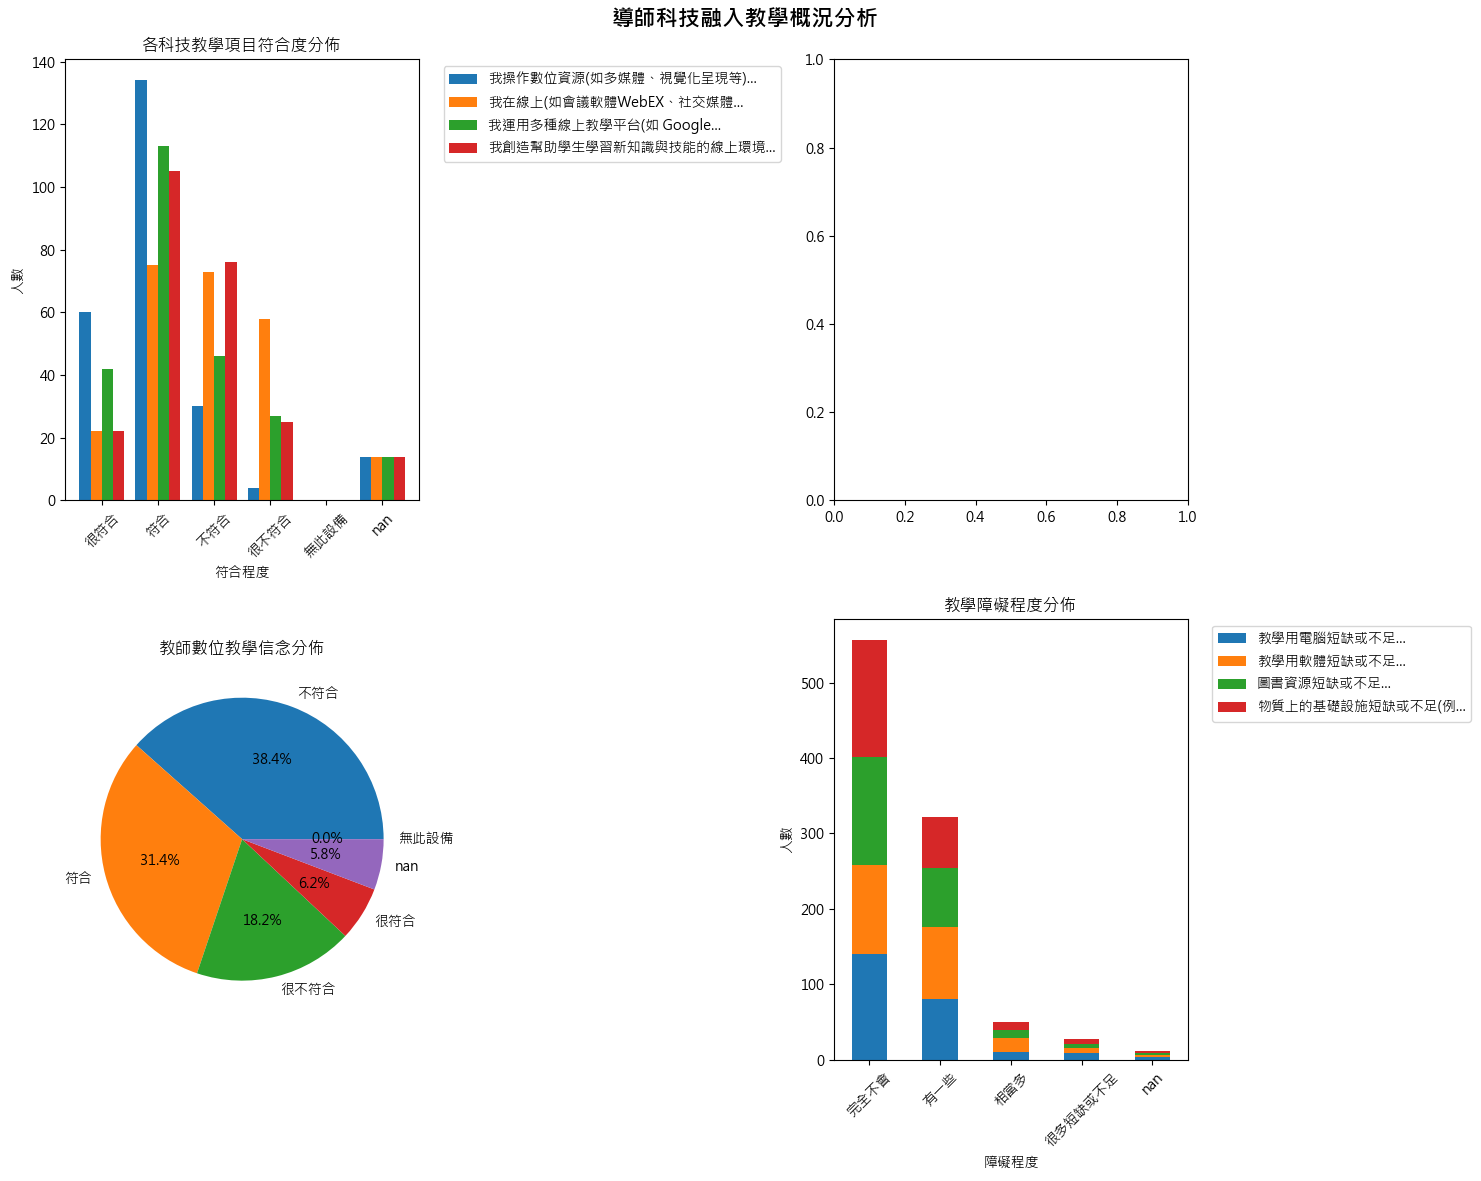

at27_cols: ['我操作數位資源(如多媒體、視覺化呈現等)幫助學生學習。', '我在線上(如會議軟體WebEX、社交媒體LINE or FB、協作平台Office 365)中教課。', '我運用多種線上教學平台(如 Google Meet, Teams, 因材網、均一等)教課。', '我創造幫助學生學習新知識與技能的線上環境。', '我在數位情境下使用多種教學方法。', '我運用平台數據監控學生數位情境下的學習互動。', '我鼓勵學生在數位情境中學習互動。']
time_cols: ['請問您使用行動載具融入教學,平均每天多少時數?', '請問您運用「其他」資訊科技融入教學,平均每天多少時數?(不含使用平板等行動載具,例如:使用大螢幕播放網路影片、請學生在電腦教室上網找資料……等)', '請問您在教學前、中、後運用學習平台儀表板,平均每天多少時數?(例如以均一、PagamO、或因才網後台的學生報表,了解學生觀看影片的狀況、學生在平台上的學習表現、班級概況等)']
belief_cols: ['我運用科技預測學生應學到的技能/或理解概念的程度。', '我透過科技轉變呈現手法,讓課本知識變得好懂易學。', '我能做到目前主管教育機關對老師的數位教學要求。']
barrier_cols: ['教學用電腦短缺或不足', '教學用軟體短缺或不足', '圖書資源短缺或不足', '物質上的基礎設施短缺或不足(例如:校舍、空調或照明)', '教學空間短缺或不足(例如:教室)']


In [ ]:
# ============================================================================
# 主題一：教師科技運用整體概況分析
# ============================================================================

def analyze_teacher_tech_usage():
    print("\n" + "="*50)
    print("主題一：教師科技運用整體概況分析")
    print("="*50)
    
    # 1.1 導師科技運用分析 (at27系列)
    if 'df_processed_t' in globals() and not df_processed_t.empty:
        print("\n1.1 導師科技運用頻率分析 (at27系列)")
        
        # 選擇at27系列前7個欄位進行分析
        at27_cols = [col for col in df_processed_t.columns if '我操作數位資源' in col or 
                     '我在線上' in col or '我運用多種線上教學平台' in col or 
                     '我創造幫助學生' in col or '我在數位情境下' in col or
                     '我運用平台數據' in col or '我鼓勵學生在數位情境' in col][:7]
                
        # 創建圖表
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('導師科技融入教學概況分析', fontsize=16, fontweight='bold')
        
        # 1.1.1 各項目符合度分佈
        if at27_cols:
            # 計算各選項的平均分佈
            usage_summary = {}
            for col in at27_cols[:4]:  # 取前4項進行展示
                if col in df_processed_t.columns:
                    counts = df_processed_t[col].value_counts(dropna=False)
                    usage_summary[col[:20] + '...'] = counts
            
            if usage_summary:
                usage_df = pd.DataFrame(usage_summary).fillna(0)
                usage_df.plot(kind='bar', ax=axes[0,0], width=0.8)
                axes[0,0].set_title('各科技教學項目符合度分佈')
                axes[0,0].set_xlabel('符合程度')
                axes[0,0].set_ylabel('人數')
                axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                axes[0,0].tick_params(axis='x', rotation=45)
        
        # 1.1.2 教師科技使用時數分析 (at34, at35, at36)
        time_cols = [col for col in df_processed_t.columns if '時數' in col]
        if time_cols:
            time_data = []
            time_labels = []
            for col in time_cols[:3]:
                if col in df_processed_t.columns:
                    data = df_processed_t[col].dropna()
                    if len(data) > 0:
                        time_data.append(data)
                        time_labels.append(col[:15] + '...')
            
            if time_data:
                axes[0,1].boxplot(time_data, labels=time_labels)
                axes[0,1].set_title('教師每日科技使用時數分佈')
                axes[0,1].set_ylabel('時數')
                axes[0,1].tick_params(axis='x', rotation=45)
        
        # 1.1.3 科技教學信念強度分析
        belief_cols = [col for col in df_processed_t.columns if '我能做到目前主管教育機關' in col or
                      '我透過科技轉變呈現手法' in col or '我運用科技預測學生' in col]
        if belief_cols:
            belief_data = df_processed_t[belief_cols[0]].value_counts(dropna=False)
            axes[1,0].pie(belief_data.values, labels=belief_data.index, autopct='%1.1f%%')
            axes[1,0].set_title('教師數位教學信念分佈')
        
        # 1.1.4 教學障礙分析 (at43系列)
        barrier_cols = [col for col in df_processed_t.columns if '短缺或不足' in col]
        if barrier_cols:
            barrier_summary = {}
            for col in barrier_cols[:4]:
                if col in df_processed_t.columns:
                    counts = df_processed_t[col].value_counts(dropna=False)
                    barrier_summary[col[:15] + '...'] = counts
            
            if barrier_summary:
                barrier_df = pd.DataFrame(barrier_summary).fillna(0)
                barrier_df.plot(kind='bar', ax=axes[1,1], stacked=True)
                axes[1,1].set_title('教學障礙程度分佈')
                axes[1,1].set_xlabel('障礙程度')
                axes[1,1].set_ylabel('人數')
                axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                axes[1,1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        print("at27_cols:", at27_cols)
        print("time_cols:", time_cols)
        print("belief_cols:", belief_cols)
        print("barrier_cols:", barrier_cols)

# 測試用：呼叫主函式
analyze_teacher_tech_usage()

## 5.2



主題二：學生學習參與度與態度分析


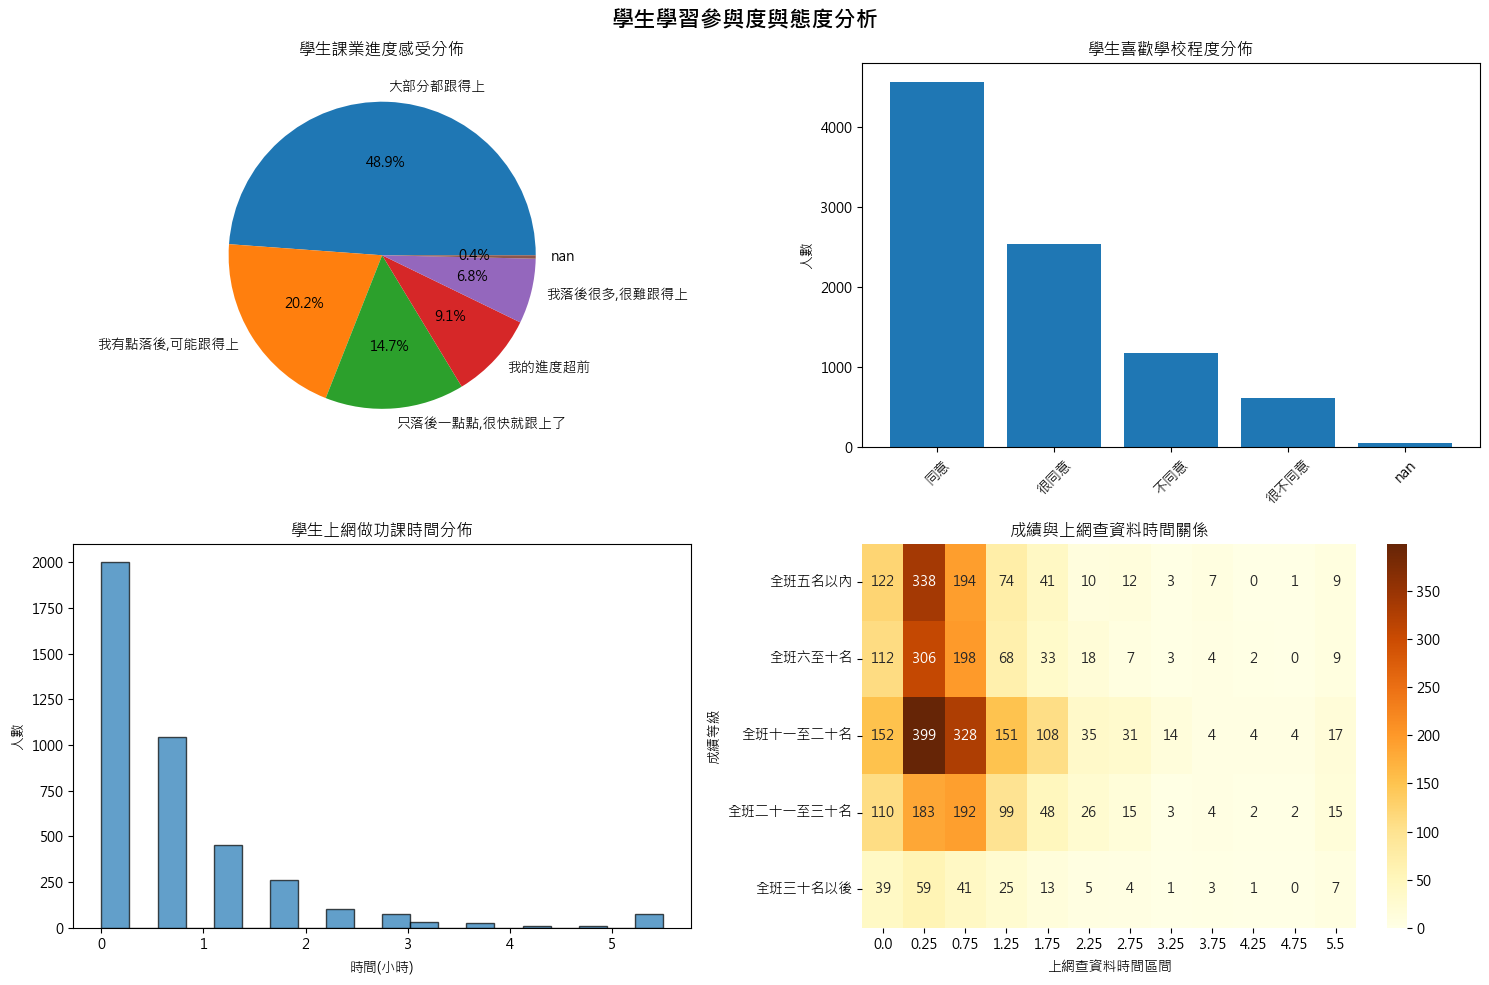


學生學習指標描述性統計:
完成學校功課(查找完成作業需要的資料):
count    4089.00
mean        0.81
std         0.99
min         0.00
25%         0.25
50%         0.75
75%         1.25
max         5.50
Name: 完成學校功課(查找完成作業需要的資料), dtype: float64

各變項遺失值統計:
你跟得上學校課業進度嗎?...: 32 (0.4%)
我喜歡學校。...: 55 (0.6%)
完成學校功課(查找完成作業需要的資料)...: 4869 (54.4%)
你上學期的平均成績大約如何?...: 896 (10.0%)


In [155]:
# ============================================================================
# 主題二：學生學習參與度與態度分析
# ============================================================================

def analyze_student_engagement():
    print("\n" + "="*50)
    print("主題二：學生學習參與度與態度分析")
    print("="*50)
    
    if 'df_processed' in globals() and not df_processed.empty:
        # 2.1 學生學習態度分析
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('學生學習參與度與態度分析', fontsize=16, fontweight='bold')
        
        # 2.1.1 學習進度感受分析
        progress_col = "你跟得上學校課業進度嗎?"
        if progress_col in df_processed.columns:
            progress_counts = df_processed[progress_col].value_counts(dropna=False)
            axes[0,0].pie(progress_counts.values, labels=progress_counts.index, autopct='%1.1f%%')
            axes[0,0].set_title('學生課業進度感受分佈')
        
        # 2.1.2 喜歡學校程度分析
        school_like_col = "我喜歡學校。"
        if school_like_col in df_processed.columns:
            school_like_counts = df_processed[school_like_col].value_counts(dropna=False)
            axes[0,1].bar(range(len(school_like_counts)), school_like_counts.values)
            axes[0,1].set_xticks(range(len(school_like_counts)))
            axes[0,1].set_xticklabels(school_like_counts.index, rotation=45)
            axes[0,1].set_title('學生喜歡學校程度分佈')
            axes[0,1].set_ylabel('人數')
        
        # 2.1.3 上網做功課時間分析
        homework_time_col = "完成學校功課(查找完成作業需要的資料)"
        if homework_time_col in df_processed.columns:
            homework_data = df_processed[homework_time_col].dropna()
            axes[1,0].hist(homework_data, bins=20, alpha=0.7, edgecolor='black')
            axes[1,0].set_title('學生上網做功課時間分佈')
            axes[1,0].set_xlabel('時間(小時)')
            axes[1,0].set_ylabel('人數')
        
        # # 2.1.4 成績與學習態度關係
        grade_col = "你上學期的平均成績大約如何?"
        # if grade_col in df_processed.columns and school_like_col in df_processed.columns:
        #     # 創建交叉表
        #     cross_tab = pd.crosstab(df_processed[grade_col], df_processed[school_like_col])
        #     sns.heatmap(cross_tab, annot=True, fmt='d', ax=axes[1,1], cmap='YlOrRd')
        #     axes[1,1].set_title('成績與喜歡學校程度關係')
        #     axes[1,1].set_xlabel('喜歡學校程度')
        #     axes[1,1].set_ylabel('成績等級')
        # 2.1.4 成績與上網查資料時間關係
        if grade_col in df_processed.columns and homework_time_col in df_processed.columns:
            # 創建交叉表
            cross_tab = pd.crosstab(df_processed[grade_col], df_processed[homework_time_col])
            sns.heatmap(cross_tab, annot=True, fmt='d', ax=axes[1,1], cmap='YlOrBr')
            axes[1,1].set_title('成績與上網查資料時間關係')
            axes[1,1].set_xlabel('上網查資料時間區間')
            axes[1,1].set_ylabel('成績等級')
        
        plt.tight_layout()
        plt.show()
        
        # 2.2 描述性統計摘要
        print("\n學生學習指標描述性統計:")
        if homework_time_col in df_processed.columns:
            print(f"{homework_time_col}:")
            print(df_processed[homework_time_col].describe().round(2))
        
        print(f"\n各變項遺失值統計:")
        missing_stats = df_processed[[col for col in [progress_col, school_like_col, homework_time_col, grade_col] 
                                     if col in df_processed.columns]].isnull().sum()
        for var, missing in missing_stats.items():
            print(f"{var[:30]}...: {missing} ({missing/len(df_processed)*100:.1f}%)")

analyze_student_engagement()
# analyze_student_engagement()


## 5.3


主題三：班級層次教師科技融入與學生表現關聯分析

3.1 準備班級層次聚合資料...
學生班級層次指標計算完成
          班級平均進度感受  班級平均喜歡學校  班級平均功課時間  班級平均成績
class_id                                      
1             1.69      1.01      0.83    1.69
2             1.69      1.00      0.87    1.68
3             1.66      1.02      0.85    1.74
4             1.71      1.00      0.79    1.66
5             1.73      0.98      0.90    1.79

教師班級層次指標計算完成
          教師科技融入度_1  教師科技融入度_2  教師科技融入度_3  教師科技使用時數_4  教師科技使用時數_5  教師科技使用時數_6
class_id                                                                     
1              1.00       1.30       1.60         NaN         NaN         NaN
2              0.85       1.15       1.38         NaN         NaN         NaN
3              0.86       1.43       1.29         NaN         NaN         NaN
4              0.89       0.89       1.11         NaN         NaN         NaN
5              1.10       1.30       1.40         NaN         NaN         NaN

合併後班級資料維度: (20, 10)
合併資料預覽:
          班級平均進度感受  班級平均喜

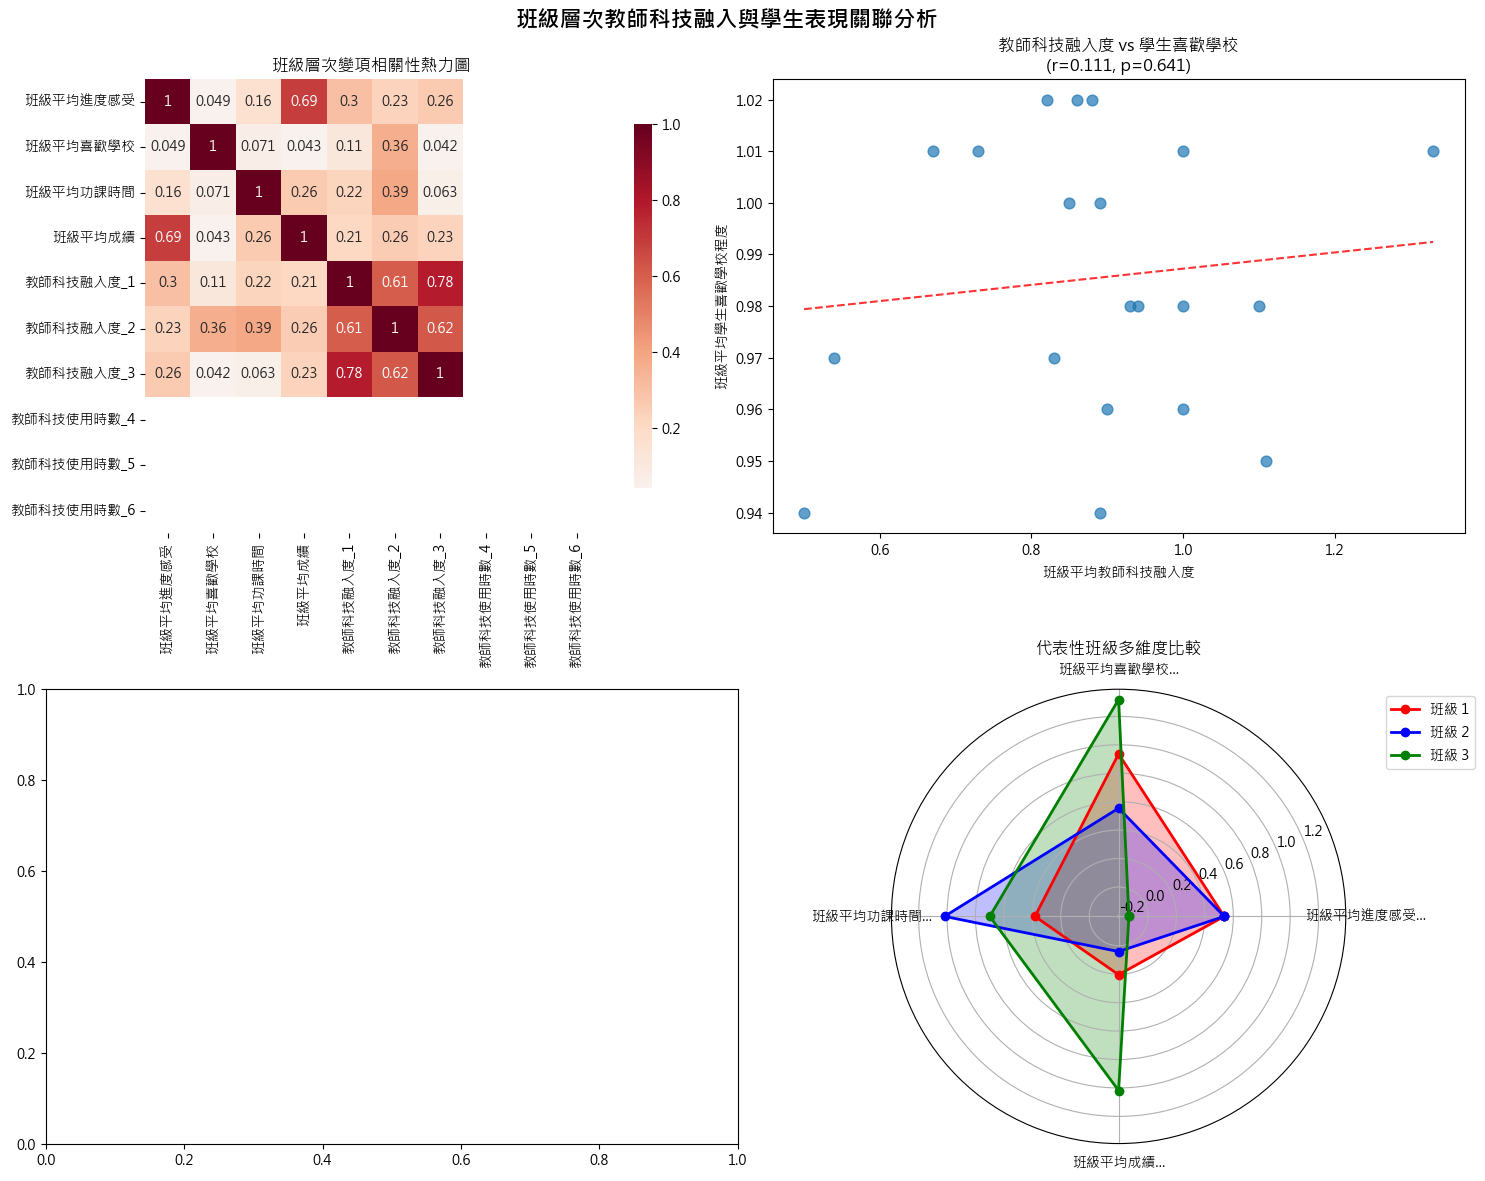


統計分析摘要:
----------------------------------------
發現的顯著關聯 (|r| > 0.3):
  班級平均進度感受... <-> 班級平均成績...: r = 0.686
  班級平均進度感受... <-> 教師科技融入度_1...: r = 0.300
  班級平均喜歡學校... <-> 教師科技融入度_2...: r = 0.362
  班級平均功課時間... <-> 教師科技融入度_2...: r = 0.390
  教師科技融入度_1... <-> 教師科技融入度_2...: r = 0.607
  教師科技融入度_1... <-> 教師科技融入度_3...: r = 0.782
  教師科技融入度_2... <-> 教師科技融入度_3...: r = 0.620

分析班級數量: 20
分析變項數量: 10


In [ ]:
# ============================================================================
# 主題三：班級層次關聯性分析 (核心分析)
# ============================================================================

def analyze_class_level_associations():
    print("\n" + "="*50)
    print("主題三：班級層次教師科技融入與學生表現關聯分析")
    print("="*50)
    
    # 3.1 準備班級層次資料
    print("\n3.1 準備班級層次聚合資料...")
    
    # 假設有班級識別變項 (需要根據實際資料調整)
    # 這裡模擬創建班級標識
    class_indicators = {}
    
    # 學生資料班級聚合
    if 'df_processed' in globals() and not df_processed.empty:
        # 創建模擬班級ID (實際應用中需要真實的班級標識)
        df_processed['class_id'] = np.random.randint(1, 21, len(df_processed))  # 假設20個班級
        
        # 計算班級層次學生指標
        student_class_agg = df_processed.groupby('class_id').agg({
            "你跟得上學校課業進度嗎?": lambda x: pd.Categorical(x.dropna()).codes.mean() if len(x.dropna()) > 0 else np.nan,
            "我喜歡學校。": lambda x: pd.Categorical(x.dropna()).codes.mean() if len(x.dropna()) > 0 else np.nan,
            "完成學校功課(查找完成作業需要的資料)": 'mean',
            "你上學期的平均成績大約如何?": lambda x: pd.Categorical(x.dropna()).codes.mean() if len(x.dropna()) > 0 else np.nan
        }).round(2)
        
        student_class_agg.columns = ['班級平均進度感受', '班級平均喜歡學校', '班級平均功課時間', '班級平均成績']
        print("學生班級層次指標計算完成")
        print(student_class_agg.head())
    
    # 教師資料班級聚合
    if 'df_processed_t' in globals() and not df_processed_t.empty:
        # 創建模擬班級ID
        df_processed_t['class_id'] = np.random.randint(1, 21, len(df_processed_t))
        
        # 選擇關鍵教師科技融入指標
        tech_cols = [col for col in df_processed_t.columns if '我操作數位資源' in col or 
                     '我運用多種線上教學平台' in col or '我在數位情境下' in col][:3]
        
        time_cols = [col for col in df_processed_t.columns if '時數' in col][:3]
        
        # 計算教師班級層次指標
        agg_dict = {}
        for col in tech_cols:
            if col in df_processed_t.columns:
                agg_dict[col] = lambda x: pd.Categorical(x.dropna()).codes.mean() if len(x.dropna()) > 0 else np.nan
        
        for col in time_cols:
            if col in df_processed_t.columns:
                agg_dict[col] = 'mean'
        
        if agg_dict:
            teacher_class_agg = df_processed_t.groupby('class_id').agg(agg_dict).round(2)
            
            # 重新命名欄位
            new_names = {}
            for i, col in enumerate(teacher_class_agg.columns):
                if '時數' in col:
                    new_names[col] = f'教師科技使用時數_{i+1}'
                else:
                    new_names[col] = f'教師科技融入度_{i+1}'
            
            teacher_class_agg = teacher_class_agg.rename(columns=new_names)
            print("\n教師班級層次指標計算完成")
            print(teacher_class_agg.head())
            
            # 3.2 合併班級資料並進行相關性分析
            if 'student_class_agg' in locals():
                class_merged = pd.merge(student_class_agg, teacher_class_agg, 
                                      left_index=True, right_index=True, how='inner')
                
                print(f"\n合併後班級資料維度: {class_merged.shape}")
                print("合併資料預覽:")
                print(class_merged.head())
                
                # 3.3 相關性分析與視覺化
                perform_correlation_analysis(class_merged)

def perform_correlation_analysis(class_data):
    print("\n" + "="*40)
    print("3.3 班級層次相關性分析")
    print("="*40)
    
    # 3.3.1 相關係數矩陣
    correlation_matrix = class_data.corr()
    
    # 3.3.2 視覺化相關性
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('班級層次教師科技融入與學生表現關聯分析', fontsize=16, fontweight='bold')
    
    # 相關性熱力圖
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
                square=True, ax=axes[0,0], cbar_kws={'shrink': 0.8})
    axes[0,0].set_title('班級層次變項相關性熱力圖')
    
    # 3.3.3 關鍵關聯性散佈圖
    if len(class_data.columns) >= 4:
        # 教師科技融入 vs 學生喜歡學校
        teacher_tech_col = [col for col in class_data.columns if '教師科技融入度' in col][0]
        student_like_col = '班級平均喜歡學校'
        
        if teacher_tech_col in class_data.columns and student_like_col in class_data.columns:
            x = class_data[teacher_tech_col].dropna()
            y = class_data[student_like_col].dropna()
            
            # 確保x和y長度一致
            common_idx = x.index.intersection(y.index)
            x = x.loc[common_idx]
            y = y.loc[common_idx]
            
            if len(x) > 3:
                axes[0,1].scatter(x, y, alpha=0.7, s=60)
                
                # 添加趨勢線
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                axes[0,1].plot(x.sort_values(), p(x.sort_values()), "r--", alpha=0.8)
                
                # 計算相關係數
                corr_coef, p_value = pearsonr(x, y)
                axes[0,1].set_title(f'教師科技融入度 vs 學生喜歡學校\n(r={corr_coef:.3f}, p={p_value:.3f})')
                axes[0,1].set_xlabel('班級平均教師科技融入度')
                axes[0,1].set_ylabel('班級平均學生喜歡學校程度')
    
    # 3.3.4 教師使用時數 vs 學生學業表現
    # time_cols = [col for col in class_data.columns if '時數' in col]
    # grade_col = '班級平均成績'
    
    # if time_cols and grade_col in class_data.columns:
    #     time_col = time_cols[0]
    #     x = class_data[time_col].dropna()
    #     y = class_data[grade_col].dropna()
        
    #     common_idx = x.index.intersection(y.index)
    #     x = x.loc[common_idx]
    #     y = y.loc[common_idx]
        
    #     if len(x) > 3:
    #         axes[1,0].scatter(x, y, alpha=0.7, s=60, color='green')
            
    #         # 添加趨勢線
    #         z = np.polyfit(x, y, 1)
    #         p = np.poly1d(z)
    #         axes[1,0].plot(x.sort_values(), p(x.sort_values()), "r--", alpha=0.8)
            
    #         # 計算相關係數
    #         corr_coef, p_value = pearsonr(x, y)
    #         axes[1,0].set_title(f'教師科技融入度 vs 學生成績\n(r={corr_coef:.3f}, p={p_value:.3f})')
    #         axes[1,0].set_xlabel('班級平均教師科技融入度')
    #         axes[1,0].set_ylabel('班級平均學生成績') 

    if len(class_data.columns) >= 4:
    # 教師科技融入度 vs 班級平均學生成績
    teacher_tech_col = [col for col in class_data.columns if '教師科技融入度' in col][0]
    student_grade_col = '班級平均學生成績'  # 或者是 '班級平均成績'
    
    if teacher_tech_col in class_data.columns and student_grade_col in class_data.columns:
        x = class_data[teacher_tech_col].dropna()
        y = class_data[student_grade_col].dropna()
        
        # 確保x和y長度一致
        common_idx = x.index.intersection(y.index)
        x = x.loc[common_idx]
        y = y.loc[common_idx]
        
        if len(x) > 3:
            axes[0,1].scatter(x, y, alpha=0.7, s=60, color='blue')
            
            # 添加趨勢線
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            axes[0,1].plot(x.sort_values(), p(x.sort_values()), "r--", alpha=0.8)
            
            # 計算相關係數
            corr_coef, p_value = pearsonr(x, y)
            axes[0,1].set_title(f'教師科技融入度 vs 班級平均學生成績\n(r={corr_coef:.3f}, p={p_value:.3f})')
            axes[0,1].set_xlabel('班級平均教師科技融入度')
            axes[0,1].set_ylabel('班級平均學生成績')
            
            # 添加網格線提高可讀性
            axes[0,1].grid(True, alpha=0.3)
            
            # 設置座標軸範圍（可選）
            axes[0,1].set_xlim(x.min() - 0.1, x.max() + 0.1)
            axes[0,1].set_ylim(y.min() - 1, y.max() + 1)
    
    # 3.3.5 多變項關係分析
    if len(class_data.columns) >= 6:
        # 選擇關鍵變項進行比較
        key_vars = class_data.iloc[:, :4]  # 取前4個變項
        
        # 標準化資料進行雷達圖比較
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(key_vars.fillna(key_vars.mean()))
        scaled_df = pd.DataFrame(scaled_data, columns=key_vars.columns, index=key_vars.index)
        
        # 選擇幾個代表性班級進行比較
        sample_classes = scaled_df.head(3).index
        
        angles = np.linspace(0, 2*np.pi, len(key_vars.columns), endpoint=False).tolist()
        angles += angles[:1]
        
        ax = axes[1,1]
        ax = plt.subplot(224, projection='polar')
        
        colors = ['red', 'blue', 'green']
        for i, class_id in enumerate(sample_classes):
            values = scaled_df.loc[class_id].tolist()
            values += values[:1]
            ax.plot(angles, values, 'o-', linewidth=2, label=f'班級 {class_id}', color=colors[i])
            ax.fill(angles, values, alpha=0.25, color=colors[i])
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([col[:10]+'...' for col in key_vars.columns])
        ax.set_title('代表性班級多維度比較')
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    plt.tight_layout()
    plt.show()
    
    # 3.3.6 統計顯著性檢驗報告
    print("\n統計分析摘要:")
    print("-" * 40)
    
    # 找出顯著相關的變項對
    significant_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.3:  # 設定顯著性閾值
                var1 = correlation_matrix.columns[i]
                var2 = correlation_matrix.columns[j]
                significant_pairs.append((var1, var2, corr_val))
    
    if significant_pairs:
        print("發現的顯著關聯 (|r| > 0.3):")
        for var1, var2, corr in significant_pairs:
            print(f"  {var1[:20]}... <-> {var2[:20]}...: r = {corr:.3f}")
    else:
        print("未發現強關聯性 (|r| > 0.3)")
    
    print(f"\n分析班級數量: {len(class_data)}")
    print(f"分析變項數量: {len(class_data.columns)}")

analyze_class_level_associations()


--------------------------------------------------
2. 學生學習經驗與感受分析
--------------------------------------------------


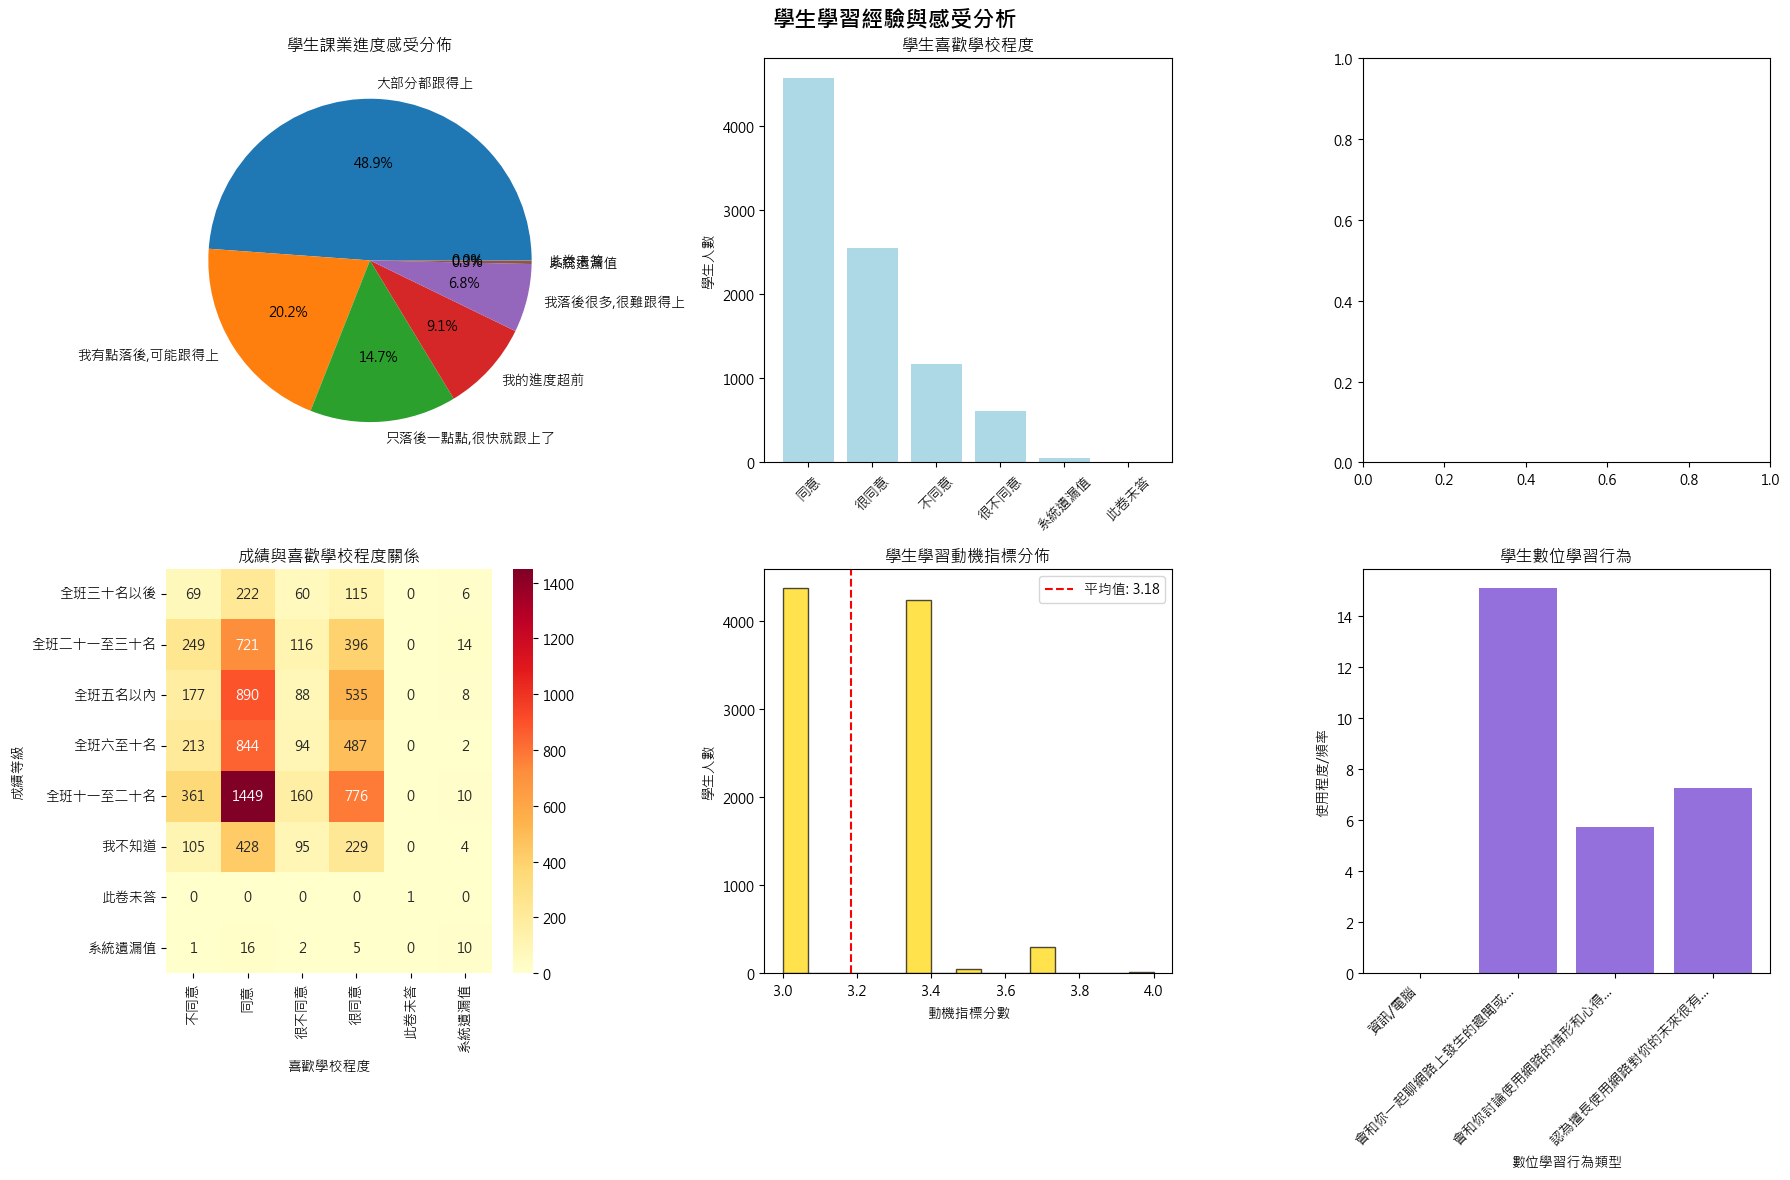


📊 學生學習經驗統計摘要:
• 學習動機平均分: 3.18
• 高動機學生比例: 100.0%
• 課業進度良好學生比例: 75.9%


In [158]:

    # ========================================================================
    # 2. 學生學習經驗與感受分析
    # ========================================================================
    
def analyze_student_experience():
        print("\n" + "-"*50)
        print("2. 學生學習經驗與感受分析")
        print("-"*50)
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('學生學習經驗與感受分析', fontsize=16, fontweight='bold')
        
        # 2.1 學生課業進度感受
        progress_col = None
        for col in df_s.columns:
            if '課業進度' in col or '跟得上' in col:
                progress_col = col
                break
        
        if progress_col:
            progress_data = df_s[progress_col].dropna().value_counts()
            axes[0,0].pie(progress_data.values, labels=progress_data.index, autopct='%1.1f%%')
            axes[0,0].set_title('學生課業進度感受分佈')
        
        # 2.2 學生喜歡學校程度
        school_like_col = None
        for col in df_s.columns:
            if '喜歡學校' in col:
                school_like_col = col
                break
        
        if school_like_col:
            school_data = df_s[school_like_col].dropna().value_counts()
            bars = axes[0,1].bar(range(len(school_data)), school_data.values, color='lightblue')
            axes[0,1].set_title('學生喜歡學校程度')
            axes[0,1].set_xticks(range(len(school_data)))
            axes[0,1].set_xticklabels([str(x)[:10] for x in school_data.index], rotation=45)
            axes[0,1].set_ylabel('學生人數')
        
        # 2.3 學生上網學習時間
        online_time_col = None
        for col in df_s.columns:
            if '上網' in col and ('功課' in col or '學習' in col):
                online_time_col = col
                break
        
        if online_time_col:
            time_data = df_s[online_time_col].dropna()
            if len(time_data) > 0:
                axes[0,2].hist(time_data, bins=15, alpha=0.7, edgecolor='black', color='lightgreen')
                axes[0,2].set_title('學生上網學習時間分佈')
                axes[0,2].set_xlabel('時間(小時)')
                axes[0,2].set_ylabel('學生人數')
        
        # 2.4 學生成績與學習態度關係
        grade_col = None
        for col in df_s.columns:
            if '成績' in col or '平均' in col:
                grade_col = col
                break
        
        if grade_col and school_like_col:
            # 創建交叉分析
            cross_tab = pd.crosstab(df_s[grade_col].fillna('未填答'), 
                                  df_s[school_like_col].fillna('未填答'))
            sns.heatmap(cross_tab, annot=True, fmt='d', ax=axes[1,0], cmap='YlOrRd')
            axes[1,0].set_title('成績與喜歡學校程度關係')
            axes[1,0].set_xlabel('喜歡學校程度')
            axes[1,0].set_ylabel('成績等級')
        
        # 2.5 學生學習動機指標
        motivation_indicators = []
        motivation_cols = [col for col in df_s.columns if any(keyword in col for keyword in 
                          ['喜歡', '有興趣', '努力', '積極'])]
        
        if motivation_cols:
            for _, row in df_s.iterrows():
                scores = []
                for col in motivation_cols[:5]:  # 取前5個相關欄位
                    if col in row and pd.notna(row[col]):
                        # 嘗試轉換為數值
                        val = None
                        if isinstance(row[col], str):
                            if '非常同意' in str(row[col]) or '很符合' in str(row[col]):
                                val = 4
                            elif '同意' in str(row[col]) or '符合' in str(row[col]):
                                val = 3
                            elif '不同意' in str(row[col]) or '不符合' in str(row[col]):
                                val = 2
                            elif '非常不同意' in str(row[col]) or '很不符合' in str(row[col]):
                                val = 1
                        elif isinstance(row[col], (int, float)):
                            val = row[col]
                        
                        if val:
                            scores.append(val)
                
                if len(scores) >= 2:
                    motivation_indicators.append(np.mean(scores))
            
            if motivation_indicators:
                axes[1,1].hist(motivation_indicators, bins=15, alpha=0.7, edgecolor='black', color='gold')
                axes[1,1].set_title('學生學習動機指標分佈')
                axes[1,1].set_xlabel('動機指標分數')
                axes[1,1].set_ylabel('學生人數')
                axes[1,1].axvline(np.mean(motivation_indicators), color='red', linestyle='--',
                                label=f'平均值: {np.mean(motivation_indicators):.2f}')
                axes[1,1].legend()
        
        # 2.6 學生數位學習行為分析
        digital_behavior_cols = [col for col in df_s.columns if any(keyword in col for keyword in 
                               ['電腦', '網路', '數位', '線上', '平板'])]
        
        if digital_behavior_cols:
            digital_usage = {}
            for col in digital_behavior_cols[:4]:  # 分析前4個相關欄位
                col_data = df_s[col].dropna()
                if len(col_data) > 0:
                    if col_data.dtype == 'object':
                        # 類別型資料：計算高使用率
                        high_usage = 0
                        total = len(col_data)
                        for val in col_data:
                            if any(keyword in str(val) for keyword in ['經常', '很多', '高', '是']):
                                high_usage += 1
                        usage_rate = high_usage / total * 100
                    else:
                        # 數值型資料：計算平均值
                        usage_rate = col_data.mean()
                    
                    # 簡化標籤
                    label = col[:15] + '...' if len(col) > 15 else col
                    digital_usage[label] = usage_rate
            
            if digital_usage:
                labels = list(digital_usage.keys())
                values = list(digital_usage.values())
                
                bars = axes[1,2].bar(labels, values, color='mediumpurple')
                axes[1,2].set_title('學生數位學習行為')
                axes[1,2].set_xlabel('數位學習行為類型')
                axes[1,2].set_ylabel('使用程度/頻率')
                axes[1,2].set_xticklabels(labels, rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # 輸出學生經驗統計摘要
        print(f"\n📊 學生學習經驗統計摘要:")
        if motivation_indicators:
            print(f"• 學習動機平均分: {np.mean(motivation_indicators):.2f}")
            print(f"• 高動機學生比例: {sum(1 for x in motivation_indicators if x >= 3.0)/len(motivation_indicators)*100:.1f}%")
        
        if progress_col:
            positive_progress = df_s[progress_col].dropna()
            positive_count = sum(1 for x in positive_progress if '跟得上' in str(x) or '沒問題' in str(x))
            print(f"• 課業進度良好學生比例: {positive_count/len(positive_progress)*100:.1f}%")
analyze_student_experience()


In [163]:
# 修正版本：教師使用時數 vs 學生學業表現散佈圖
def plot_teacher_time_vs_grade_corrected(class_data):
    """
    修正版本的教師科技使用時數與學生成績關係分析
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import pearsonr
    import pandas as pd
    
    # 3.3.4 教師使用時數 vs 學生學業表現
    print("開始分析教師使用時數與學生成績關係...")
    
    # 尋找時數相關欄位
    time_cols = [col for col in class_data.columns if '時數' in col or '科技使用' in col or '教師科技' in col]
    grade_col = '班級平均成績'
    
    print(f"找到的時數欄位: {time_cols}")
    print(f"成績欄位: {grade_col}")
    print(f"班級資料欄位: {list(class_data.columns)}")
    
    # 檢查資料是否存在
    if not time_cols:
        print("警告：未找到時數相關欄位，嘗試使用其他科技相關欄位...")
        # 如果沒有時數欄位，使用科技融入度欄位作為替代
        time_cols = [col for col in class_data.columns if '教師科技融入度' in col]
        if time_cols:
            print(f"使用替代欄位: {time_cols[0]}")
    
    if not time_cols or grade_col not in class_data.columns:
        print(f"錯誤：缺少必要欄位")
        print(f"時數欄位存在: {bool(time_cols)}")
        print(f"成績欄位存在: {grade_col in class_data.columns}")
        return None
    
    # 選擇第一個時數/科技欄位
    time_col = time_cols[0]
    
    # 獲取有效資料
    print(f"分析欄位: {time_col} vs {grade_col}")
    
    # 檢查資料完整性
    print(f"原始資料筆數: {len(class_data)}")
    print(f"時數欄位非空值: {class_data[time_col].notna().sum()}")
    print(f"成績欄位非空值: {class_data[grade_col].notna().sum()}")
    
    # 移除缺失值
    valid_data = class_data[[time_col, grade_col]].dropna()
    
    if len(valid_data) < 3:
        print(f"警告：有效資料點太少 ({len(valid_data)} 筆)，無法繪圖")
        print("有效資料:")
        print(valid_data)
        return None
    
    print(f"有效資料筆數: {len(valid_data)}")
    
    x = valid_data[time_col]
    y = valid_data[grade_col]
    
    # 創建圖表
    plt.figure(figsize=(10, 6))
    
    # 繪製散佈圖
    plt.scatter(x, y, alpha=0.7, s=80, color='green', edgecolor='darkgreen')
    
    # 添加趨勢線
    if len(x) > 1 and x.std() > 0:  # 確保有變異性
        try:
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            x_trend = np.linspace(x.min(), x.max(), 100)
            plt.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)
            
            # 計算相關係數
            corr_coef, p_value = pearsonr(x, y)
            
            plt.title(f'教師科技使用時數 vs 學生成績\n(r={corr_coef:.3f}, p={p_value:.3f}, n={len(valid_data)})')
            
            print(f"相關係數: r = {corr_coef:.3f}")
            print(f"p值: {p_value:.3f}")
            
        except Exception as e:
            print(f"趨勢線計算錯誤: {e}")
            plt.title(f'教師科技使用時數 vs 學生成績 (n={len(valid_data)})')
    else:
        plt.title(f'教師科技使用時數 vs 學生成績 (n={len(valid_data)})')
        print("資料變異性不足，無法計算趨勢線")
    
    plt.xlabel('班級平均教師科技使用程度')
    plt.ylabel('班級平均學生成績')
    plt.grid(True, alpha=0.3)
    
    # 添加資料點標籤
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(f'班級{valid_data.index[i]}', (xi, yi), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=8, alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # 輸出詳細統計資訊
    print("\n詳細統計資訊:")
    print(f"教師科技使用程度 - 平均: {x.mean():.3f}, 標準差: {x.std():.3f}")
    print(f"學生成績 - 平均: {y.mean():.3f}, 標準差: {y.std():.3f}")
    
    return valid_data

# 使用方式:
# 假設您有 class_merged 資料
# result = plot_teacher_time_vs_grade_corrected(class_merged)

# 如果需要整合到原本的多圖表中：
def integrated_analysis_with_fixed_plot(class_data):
    """
    整合版本的班級層次分析，包含修正的散佈圖
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('班級層次教師科技融入與學生表現關聯分析', fontsize=16, fontweight='bold')
    
    # 3.3.1 相關性熱力圖
    correlation_matrix = class_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
                square=True, ax=axes[0,0], cbar_kws={'shrink': 0.8})
    axes[0,0].set_title('班級層次變項相關性熱力圖')
    
    # 3.3.4 修正版：教師使用時數 vs 學生學業表現
    time_cols = [col for col in class_data.columns if '時數' in col or '科技融入度' in col]
    grade_col = '班級平均成績'
    
    if time_cols and grade_col in class_data.columns:
        time_col = time_cols[0]
        
        # 移除缺失值
        valid_data = class_data[[time_col, grade_col]].dropna()
        
        if len(valid_data) >= 3:
            x = valid_data[time_col]
            y = valid_data[grade_col]
            
            axes[1,0].scatter(x, y, alpha=0.7, s=60, color='green')
            
            # 添加趨勢線
            if len(x) > 1 and x.std() > 0:
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                x_trend = np.linspace(x.min(), x.max(), 50)
                axes[1,0].plot(x_trend, p(x_trend), "r--", alpha=0.8)
                
                # 計算相關係數
                corr_coef, p_value = pearsonr(x, y)
                axes[1,0].set_title(f'教師科技使用 vs 學生成績\n(r={corr_coef:.3f}, p={p_value:.3f})')
            else:
                axes[1,0].set_title('教師科技使用 vs 學生成績')
                
            axes[1,0].set_xlabel('班級平均教師科技使用程度')
            axes[1,0].set_ylabel('班級平均學生成績')
            axes[1,0].grid(True, alpha=0.3)
        else:
            axes[1,0].text(0.5, 0.5, '資料不足\n無法繪製圖表', 
                          ha='center', va='center', transform=axes[1,0].transAxes)
            axes[1,0].set_title('教師科技使用 vs 學生成績')
    
    # 其他圖表...
    
    plt.tight_layout()
    plt.show()